# Lab 7- Data Analysis

Exercises 1-4 are to be completed by Match 29th. The remaider of the lab is due April 5th. Before leaving lab today, everyone must download the dataset.

## Exercise 1: Reading

### HiggsML
In 2014, some of my colleagues from the ATLAS experiment put together a Higgs Machine Learning Challenge, which was hosted on [Kaggle](https://www.kaggle.com). Please read sections 1 and 3 (skip/skim 2) of [The HiggsML Technical Documentation](https://higgsml.lal.in2p3.fr/files/2014/04/documentation_v1.8.pdf). 

Kaggle is a platform for data science competitions, with cash awards for winners. Kaggle currently hosts over 50,000 public datasets and associated competitions. Later in the course we will look at a variety of problems hosted on Kaggle and similar platforms. 

### SUSY Dataset

For the next few labs we will use datasets used in the [first paper on Deep Learning in High Energy physics](https://arxiv.org/pdf/1402.4735.pdf). Please read up to the "Deep Learning" section (end of page 5). This paper demonstrates that Deep Neural Networks can learn from raw data the features that are typically used by physicists for searches for exotics particles. The authors provide the data they used for this paper. They considered two benchmark scenarios: Higgs and SUSY.

## Exercise 2: Download SUSY Dataset

The information about the dataset can be found at the [UCI Machine Learning Repository](https://archive.ics.uci.edu/ml/index.php). We'll start with the [SUSY Dataset](https://archive.ics.uci.edu/ml/datasets/SUSY). 

### Download
In a terminal, download the data directly from the source and then decompress it. For example:

* To download:
    * On Mac OS: 
    `curl http://archive.ics.uci.edu/ml/machine-learning-databases/00279/SUSY.csv.gz > SUSY.csv.gz`

    * In linux:
    `wget http://archive.ics.uci.edu/ml/machine-learning-databases/00279/SUSY.csv.gz`

* To uncompress:
`gunzip SUSY.csv.gz`

In [8]:
!curl http://archive.ics.uci.edu/ml/machine-learning-databases/00279/SUSY.csv.gz > SUSY.csv.gz

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  879M    0  879M    0     0  5966k      0 --:--:--  0:02:30 --:--:-- 6022k    0  2928k      0 --:--:--  0:00:17 --:--:-- 3990k13M    0     0  2775k      0 --:--:--  0:00:41 --:--:-- 3021k2868k      0 --:--:--  0:00:46 --:--:-- 3646k   0  2843k      0 --:--:--  0:00:53 --:--:-- 1844k3k      0 --:--:--  0:02:06 --:--:--  280k    0  5913k      0 --:--:--  0:02:09 --:--:-- 1233k0     0  5886k      0 --:--:--  0:02:10 --:--:-- 1646k    0  5926k      0 --:--:--  0:02:19 --:--:-- 8885k     0  5971k      0 --:--:--  0:02:21 --:--:-- 10.1M


In [ ]:
!gunzip SUSY.csv.gz


SUSY.csv already exists -- do you wish to overwrite (y or n)? 

In [4]:
ls -lh

total 6489112
-rw-r--r--  1 sashisoni  staff   384K Apr 20 23:02 Lab.7.ipynb
-rw-r--r--  1 sashisoni  staff   387K Apr 20 23:16 Lab.7_Solutions.ipynb
-rw-r--r--  1 sashisoni  staff   2.2G Mar 22 11:48 SUSY.csv
-rw-r--r--  1 sashisoni  staff   880M Apr 20 23:16 SUSY.csv.gz
-rw-r--r--  1 sashisoni  staff   1.4K Apr 20 23:14 Untitled.ipynb


The data is provided as a comma separated file.

In [9]:
filename="SUSY.csv"
# print out the first 5 lines using unix head command
!head -5  "SUSY.csv"

0.000000000000000000e+00,9.728614687919616699e-01,6.538545489311218262e-01,1.176224589347839355e+00,1.157156467437744141e+00,-1.739873170852661133e+00,-8.743090629577636719e-01,5.677649974822998047e-01,-1.750000417232513428e-01,8.100607395172119141e-01,-2.525521218776702881e-01,1.921887040138244629e+00,8.896374106407165527e-01,4.107718467712402344e-01,1.145620822906494141e+00,1.932632088661193848e+00,9.944640994071960449e-01,1.367815494537353516e+00,4.071449860930442810e-02
1.000000000000000000e+00,1.667973041534423828e+00,6.419061869382858276e-02,-1.225171446800231934e+00,5.061022043228149414e-01,-3.389389812946319580e-01,1.672542810440063477e+00,3.475464344024658203e+00,-1.219136357307434082e+00,1.295456290245056152e-02,3.775173664093017578e+00,1.045977115631103516e+00,5.680512785911560059e-01,4.819284379482269287e-01,0.000000000000000000e+00,4.484102725982666016e-01,2.053557634353637695e-01,1.321893453598022461e+00,3.775840103626251221e-01
1.000000000000000000e+00,4.4483992457389831

### First Look

Each row represents a LHC collision event. Each column contains some observable from that event. The variable names are ([based on documentation](https://archive.ics.uci.edu/ml/datasets/SUSY)):

In [5]:
VarNames=["signal", "l_1_pT", "l_1_eta","l_1_phi", "l_2_pT", "l_2_eta", "l_2_phi", "MET", "MET_phi", "MET_rel", "axial_MET", "M_R", "M_TR_2", "R", "MT2", "S_R", "M_Delta_R", "dPhi_r_b", "cos_theta_r1"]

Some of these variables represent the "raw" kinematics of the observed final state particles, while others are "features" that are derived from these raw quantities:

In [6]:
RawNames=["l_1_pT", "l_1_eta","l_1_phi", "l_2_pT", "l_2_eta", "l_2_phi", "MET", "MET_phi"]
FeatureNames=list(set(VarNames[1:]).difference(RawNames))

In [7]:
RawNames

['l_1_pT',
 'l_1_eta',
 'l_1_phi',
 'l_2_pT',
 'l_2_eta',
 'l_2_phi',
 'MET',
 'MET_phi']

In [8]:
FeatureNames

['MT2',
 'S_R',
 'axial_MET',
 'cos_theta_r1',
 'M_Delta_R',
 'M_R',
 'dPhi_r_b',
 'M_TR_2',
 'R',
 'MET_rel']

We will use pandas to read in the file, and matplotlib to make plots. The following ensures pandas is installed and sets everything up:

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

Now we can read the data into a pandas dataframe:

In [10]:
filename = "SUSY.csv"
df = pd.read_csv(filename, dtype='float64', names=VarNames)

You can see the data in Jupyter by just evaluateing the dataframe:

In [11]:
df

signal    l_1_pT   l_1_eta   l_1_phi    l_2_pT   l_2_eta   l_2_phi  \
0           0.0  0.972861  0.653855  1.176225  1.157156 -1.739873 -0.874309   
1           1.0  1.667973  0.064191 -1.225171  0.506102 -0.338939  1.672543   
2           1.0  0.444840 -0.134298 -0.709972  0.451719 -1.613871 -0.768661   
3           1.0  0.381256 -0.976145  0.693152  0.448959  0.891753 -0.677328   
4           1.0  1.309996 -0.690089 -0.676259  1.589283 -0.693326  0.622907   
...         ...       ...       ...       ...       ...       ...       ...   
4999995     1.0  0.853325 -0.961783 -1.487277  0.678190  0.493580  1.647969   
4999996     0.0  0.951581  0.139370  1.436884  0.880440 -0.351948 -0.740852   
4999997     0.0  0.840389  1.419162 -1.218766  1.195631  1.695645  0.663756   
4999998     1.0  1.784218 -0.833565 -0.560091  0.953342 -0.688969 -1.428233   
4999999     0.0  0.761500  0.680454 -1.186213  1.043521 -0.316755  0.246879   

              MET   MET_phi   MET_rel  axial_MET       M_R    M_TR_2  \
0        0.567765 -0.175000  0.810061  -0.252552  1.921887  0.889637   
1        3.475464 -1.219136  0.012955   3.775174  1.045977  0.568051   
2        1.219918  0.504026  1.831248  -0.431385  0.526283  0.941514   
3        2.033060  1.533041  3.046260  -1.005285  0.569386  1.015211   
4        1.087562 -0.381742  0.589204   1.365479  1.179295  0.968218   
...           ...       ...       ...        ...       ...       ...   
4999995  1.843867  0.276954  1.025105  -1.486535  0.892879  1.684429   
4999996  0.290863 -0.732360  0.001360   0.257738  0.802871  0.545319   
4999997  0.490888 -0.509186  0.704289   0.045744  0.825015  0.723530   
4999998  2.660703 -0.861344  2.116892   2.906151  1.232334  0.952444   
4999999  1.120280  0.998479  1.640881  -0.797688  0.854212  1.121858   

                R       MT2       S_R  M_Delta_R  dPhi_r_b  cos_theta_r1  
0        0.410772  1.145621  1.932632   0.994464  1.367815      0.040714  
1        0.481928  0.000000  0.448410   0.205356  1.321893      0.377584  
2        1.587535  2.024308  0.603498   1.562374  1.135454      0.180910  
3        1.582217  1.551914  0.761215   1.715464  1.492257      0.090719  
4        0.728563  0.000000  1.083158   0.043429  1.154854      0.094859  
...           ...       ...       ...        ...       ...           ...  
4999995  1.674084  3.366298  1.046707   2.646649  1.389226      0.364599  
4999996  0.602730  0.002998  0.748959   0.401166  0.443471      0.239953  
4999997  0.778236  0.752942  0.838953   0.614048  1.210595      0.026692  
4999998  0.685846  0.000000  0.781874   0.676003  1.197807      0.093689  
4999999  1.165438  1.498351  0.931580   1.293524  1.539167      0.187496  

[5000000 rows x 19 columns]

In [23]:
!head -500000 SUSY.csv > SUSY-small.csv

The first column stores the "truth" label of whether an event was signal or not. Pandas makes it easy to create dataframes that store only the signal or background events:

In [12]:
df_sig=df[df.signal==1]
df_bkg=df[df.signal==0]

The following example plots the signal and background distributions of every variable. Note that we use VarNames[1:] to skip the first variable, which was the true label.

l_1_pT


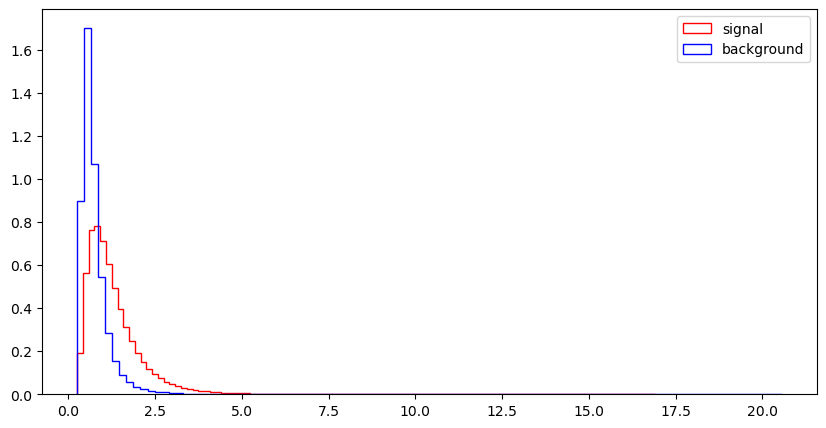

l_1_eta


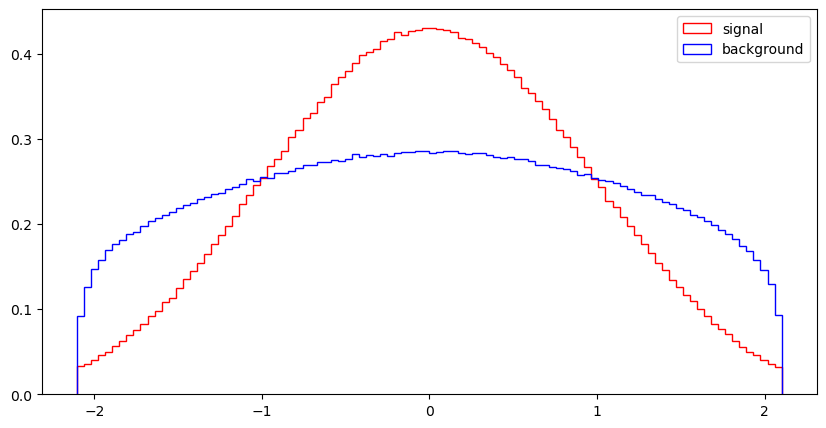

l_1_phi


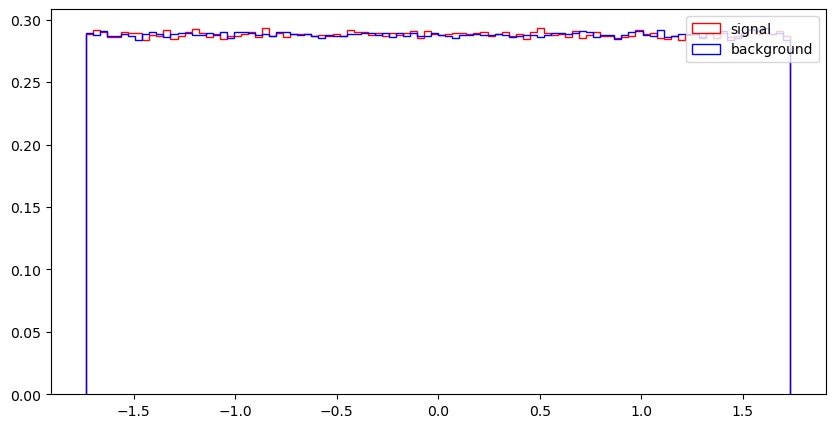

l_2_pT


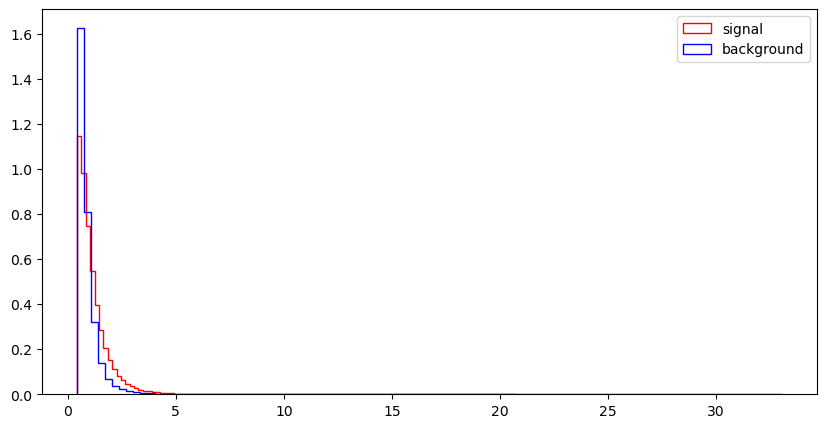

l_2_eta


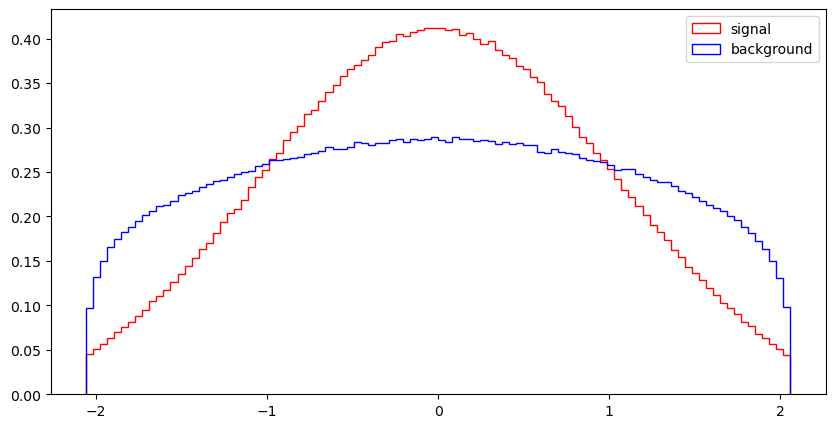

l_2_phi


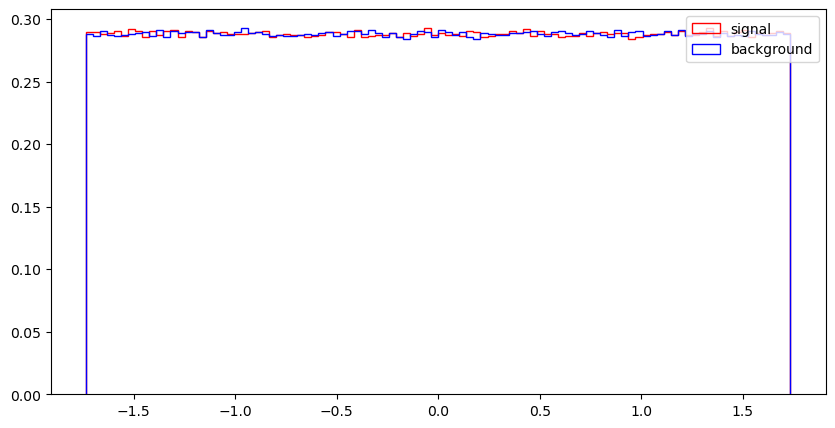

MET


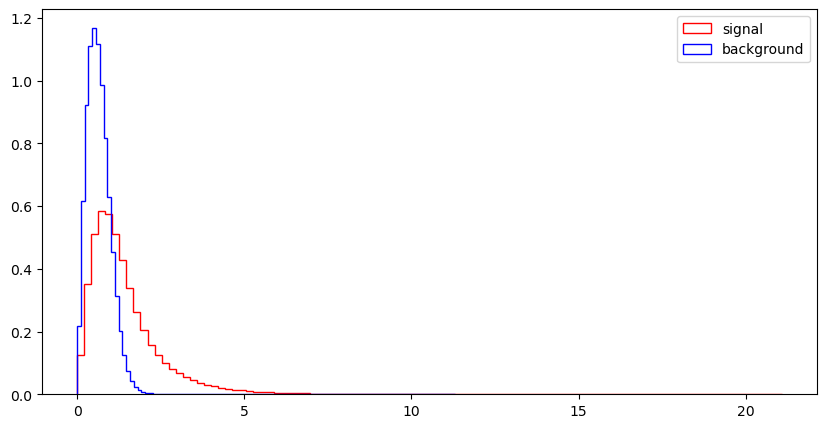

MET_phi


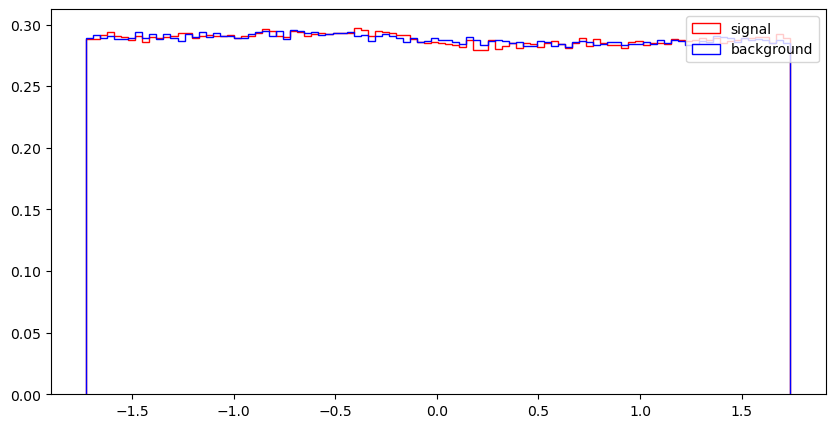

MET_rel


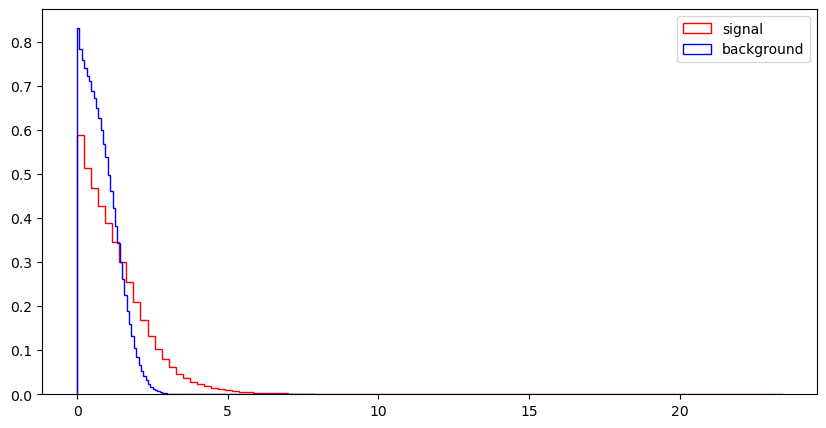

axial_MET


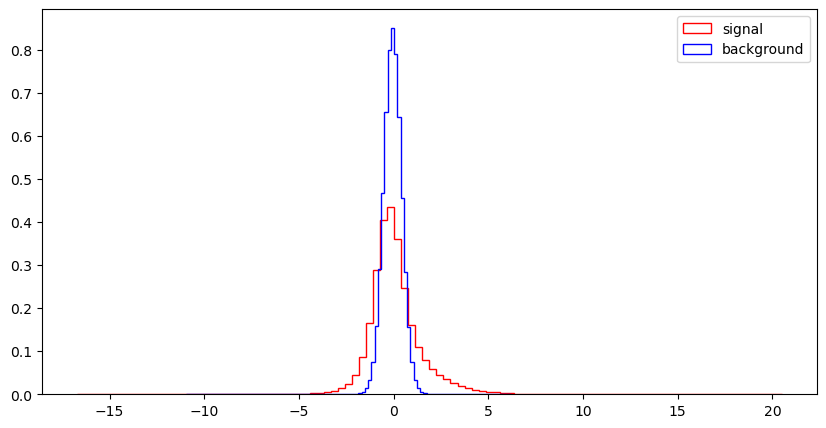

M_R


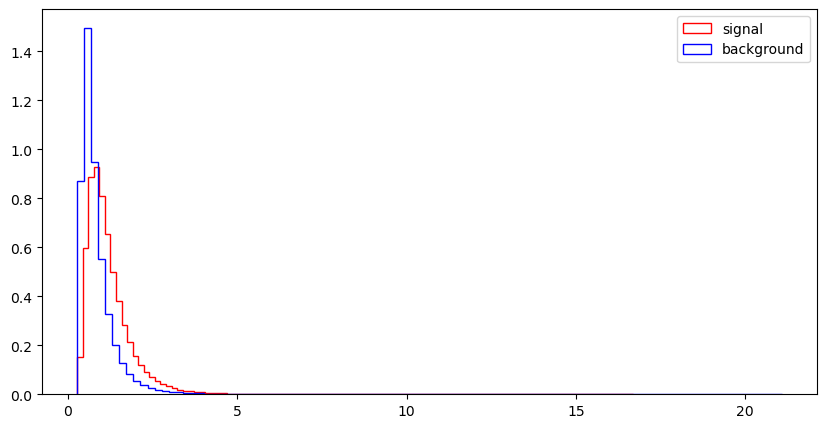

M_TR_2


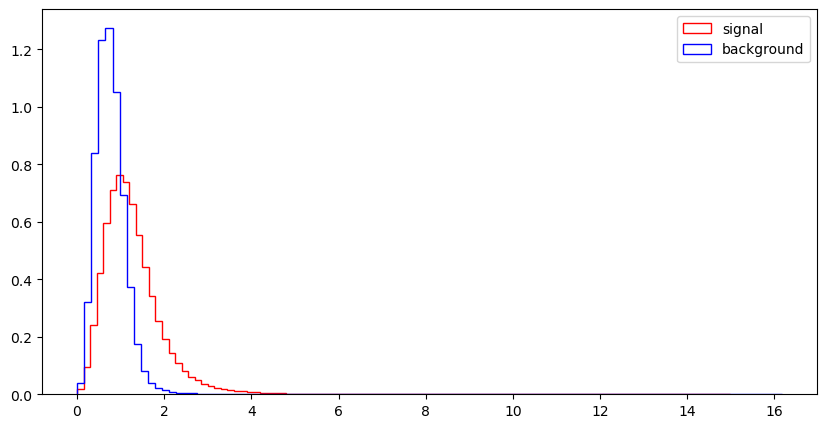

R


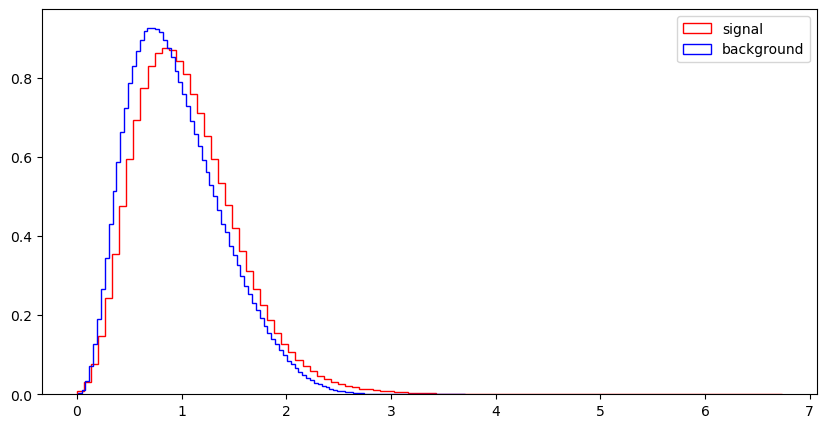

MT2


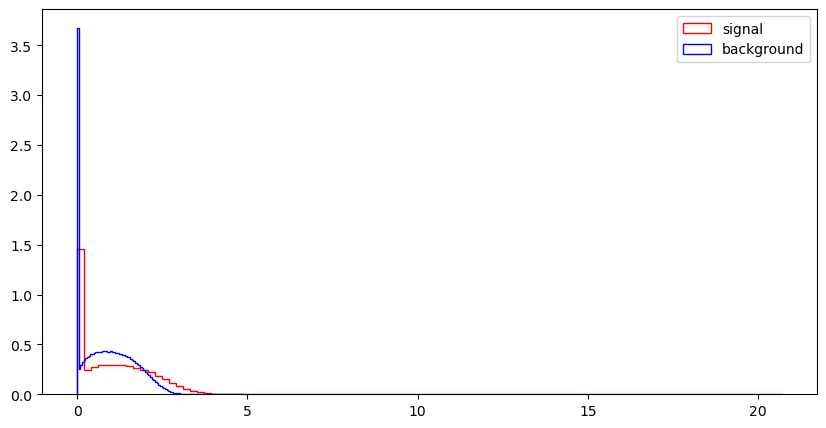

S_R


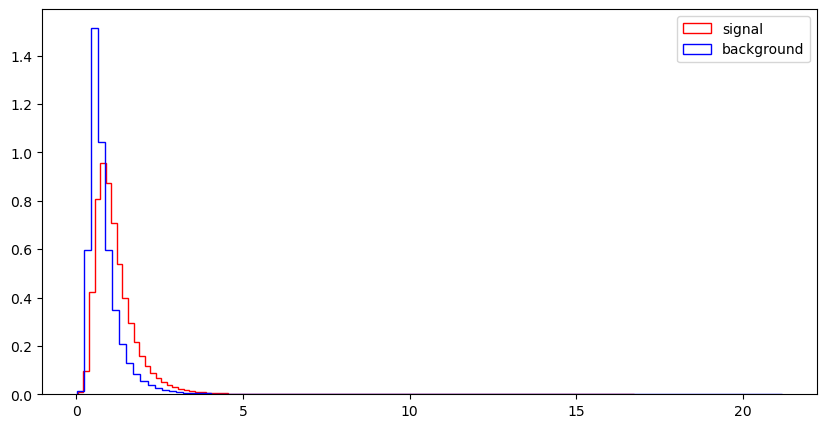

M_Delta_R


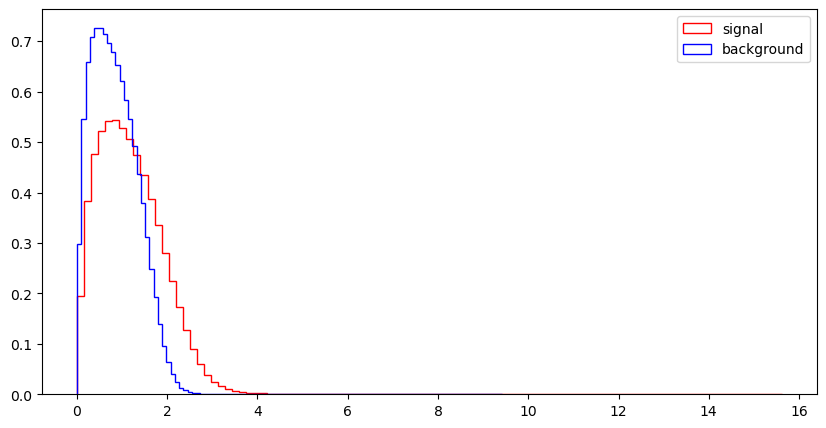

dPhi_r_b


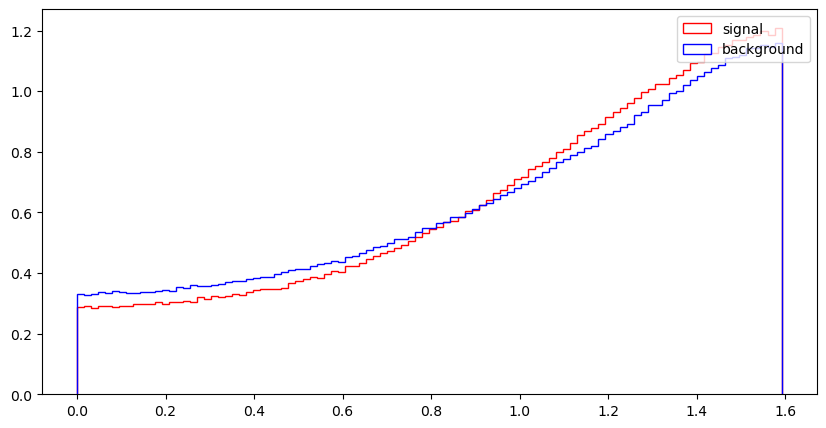

cos_theta_r1


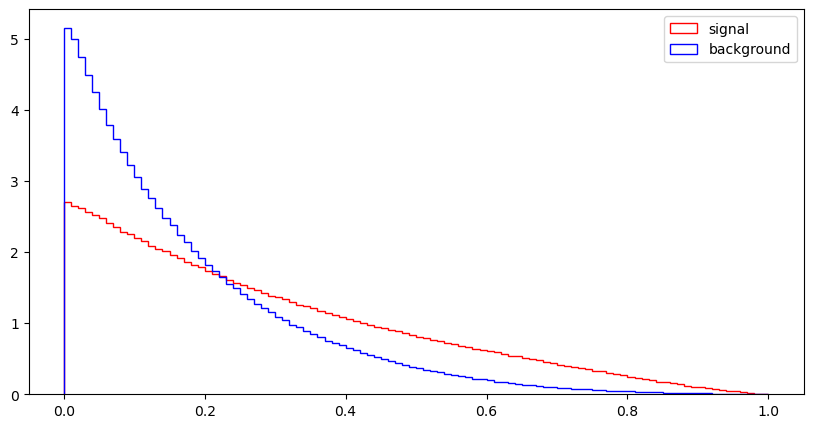

In [13]:
import numpy as np
for var in VarNames[1:]:
    print (var)
    plt.figure(figsize=(10,5))
    plt.hist(np.array(df_sig[var]),bins=100,histtype="step", color="red",label="signal",density=1, stacked=True)
    plt.hist(np.array(df_bkg[var]),bins=100,histtype="step", color="blue", label="background",density=1, stacked=True)
    plt.legend(loc='upper right')
    plt.show()

## Exercise 3: Make nice figures

Now use `matplotlib` to reproduce as closely as you can figures 5 and 6 from the paper. This exercise is intended to get you to familiarize yourself with making nicely formatted `matplotlib` figures with multiple plots. Note that the plots in the paper are actually wrong!

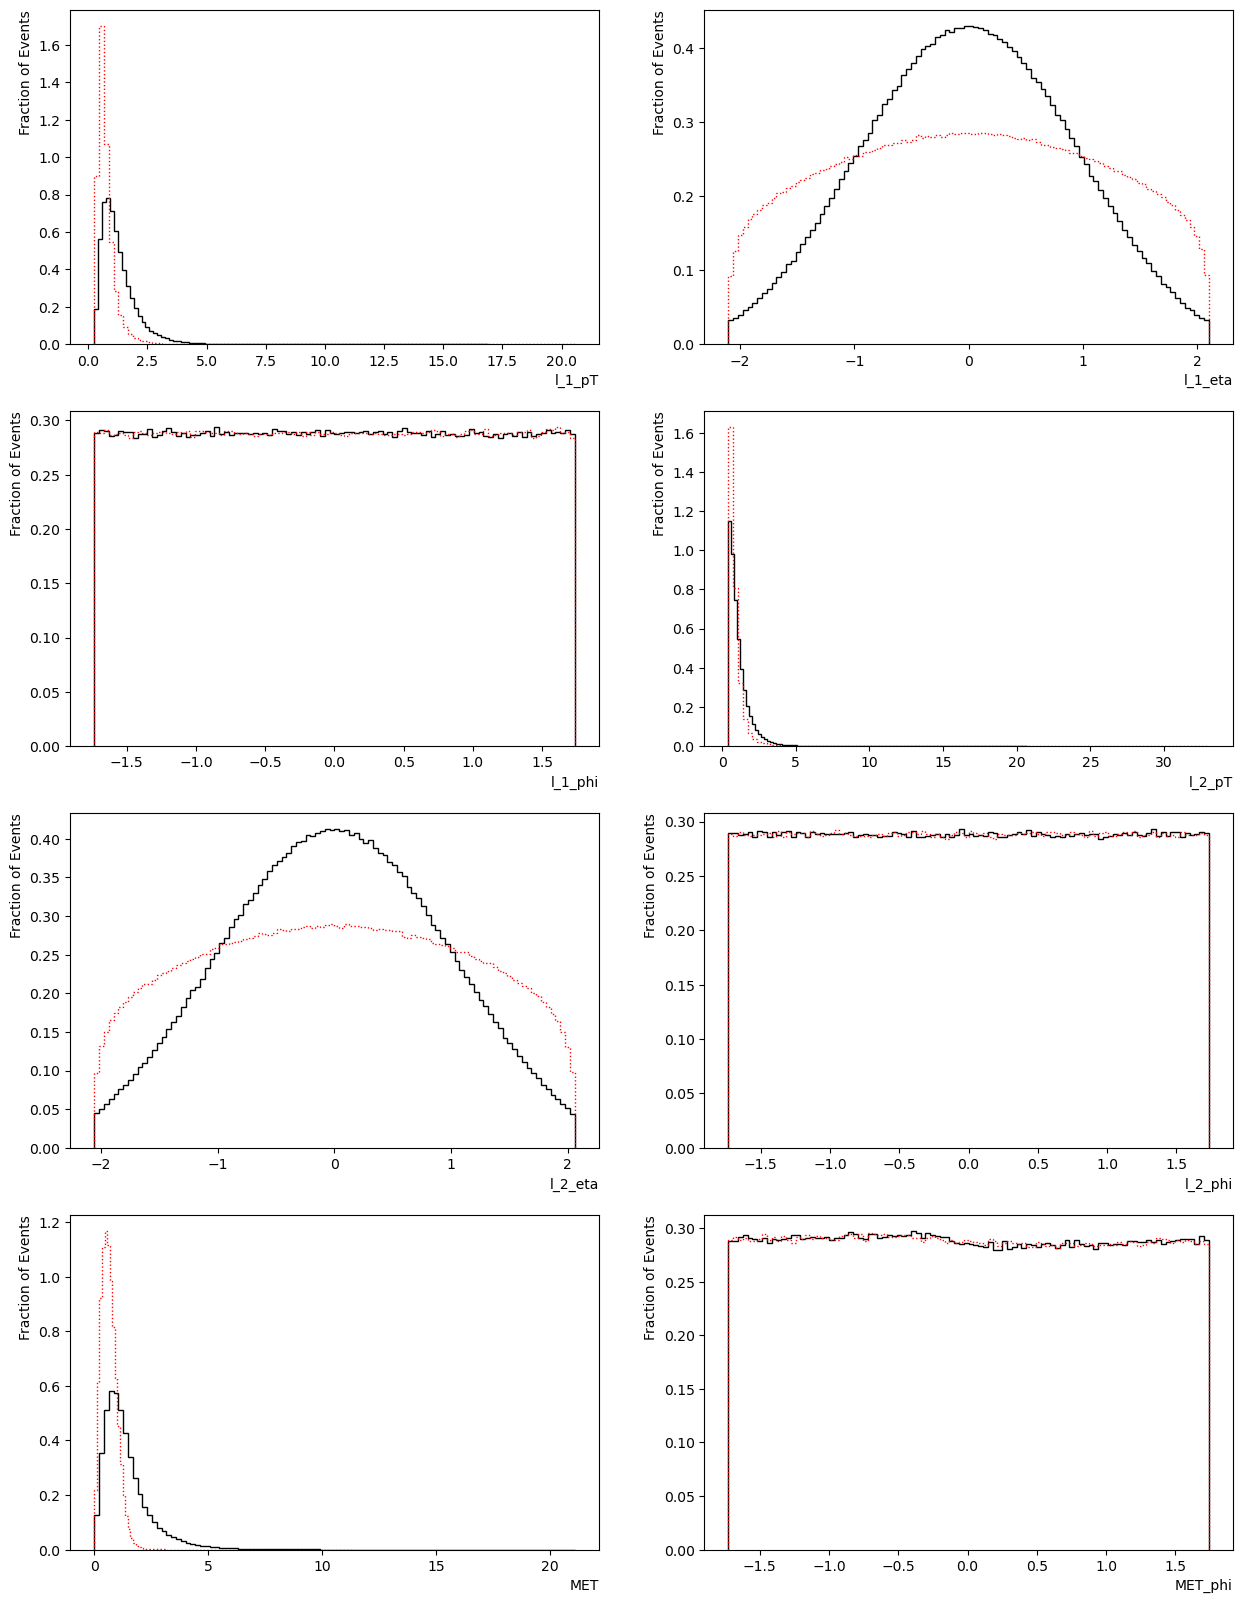

In [14]:
#Figure 5 re-creation

plt.figure(figsize=(15,20))

#enumerating and looping through each variable
for i,var in enumerate(RawNames):
    #layout of plots, 4 rows, 2 columns; i+1 indicates index
    plt.subplot(4,2,i+1)
    plt.hist(np.array(df_sig[var]),bins=100,histtype="step", color="black",label="signal",density=1, stacked=True)
    plt.hist(np.array(df_bkg[var]),bins=100,histtype="step", color="red", label="background",density=1, stacked=True,ls=':')
    plt.xlabel(var,loc='right') #using variable name as x-axis label, and right aligning it
    plt.ylabel('Fraction of Events',loc='top') #labeling y-axis, and top aligning it
plt.show()

## Exercise 4: Correlation

### Exercise 4.1

#### Part a
Write a function that creates pair plots and use it to compare variables in the SUSY and Higgs samples, separately for low and high-level features. Refer to Lecture 13 for details. Do not use `seaborn`.

#### Part b
Making these plots can be slow because creating each plot initiates a full loop over the data. Make at least one modification to your function in part a to speed it up. Can you propose a different method of creating histograms that would speed up making such pair plots?

#### Part c
Which observables appear to be best for separating signal from background?

In [15]:
#function that iterates through specified columns to create histogram
def compare_distributions(df,column_name,selections,**kwargs):
    #looping through each key/value pair from selections
    for label,selection in selections.items(): 
        _=plt.hist(df[selection][column_name],label=label,**kwargs) #plotting histogram of selected feature and column
    
    _=plt.legend() #inclusion of legend

#function that iterates through specified columns to create a scatterplot
def compare_scatter(df,x_var_name,y_var_name,selections,make_legend=True,**kwargs) :
    #looping through each key/value pair from selections
    for label,selection in selections.items():   
        _=plt.scatter(df[selection][x_var_name],df[selection][y_var_name],label=label,**kwargs) #scatterplot of each selection

    _=plt.xlabel(x_var_name) #labeling
    _=plt.ylabel(y_var_name)

    if make_legend:
        _=plt.legend() #inclusion of legend depending on whether 'make_legend' argument is true/false


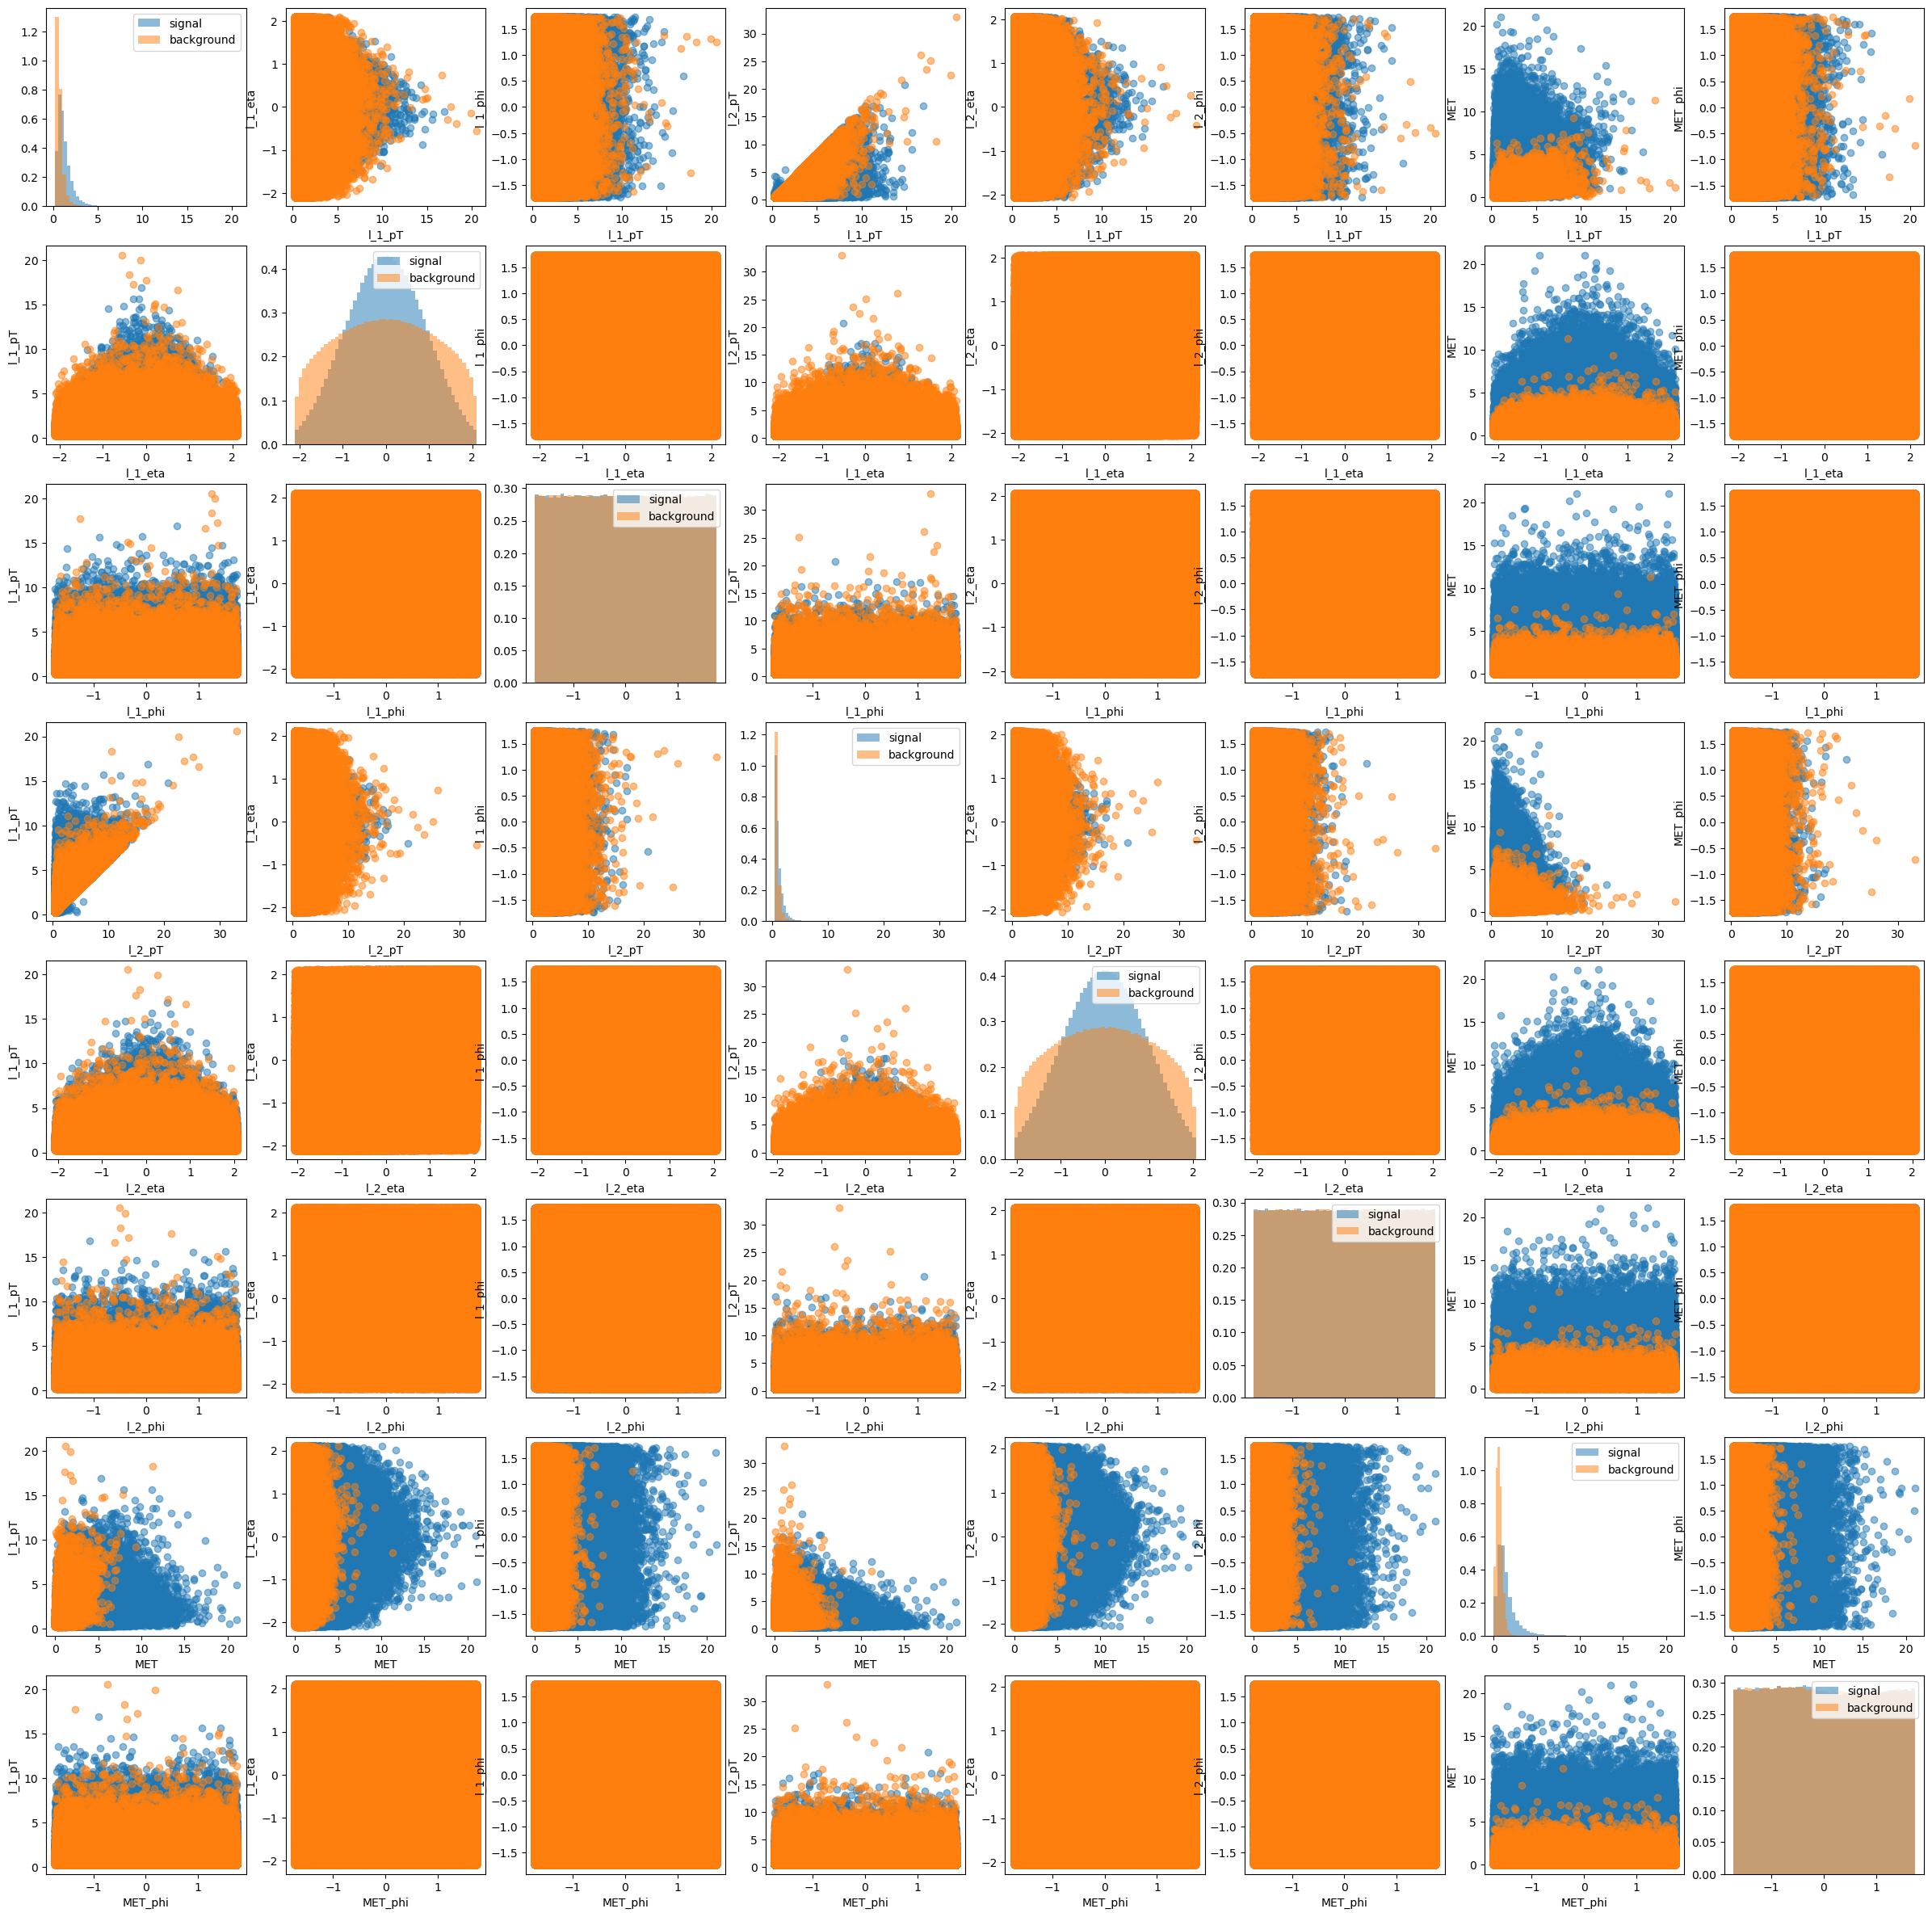

In [16]:
#low-level features (RawNames)
selection_dict={'signal':df['signal']==1,'background':df['signal']==0} #label/naming and telling that 0/1 means background/signal respectively
n_columns=len(RawNames)
plt.figure(figsize=(30,30)) #setting up figure size

plot_i=0 #counter to allow for indexing for placement of subplots

#iterating and enumerating through variables (low level features specifically)
for i,x_var_name in enumerate(RawNames):
    #another loop since plotting each variable against each other
    for j,y_var_name in enumerate(RawNames):
        plot_i+=1 #increase counter for indexing
        plt.subplot(n_columns,n_columns,plot_i) #subplot layout is the number of features by number of features; 'plot_it' is the index
        make_legend = plot_i==1
        if i==j: #plots on the diagonal
            #plot histogram of feature instead of scatterplot of one feature against itself
            compare_distributions(df,x_var_name,
                     selection_dict,
                     alpha=0.5,
                     density=1,
                     bins=50,
                     )
        else:
            #when not on the diagonal, plot the scatter plot
            compare_scatter(df,x_var_name,y_var_name,selection_dict,make_legend=make_legend,alpha=0.5)

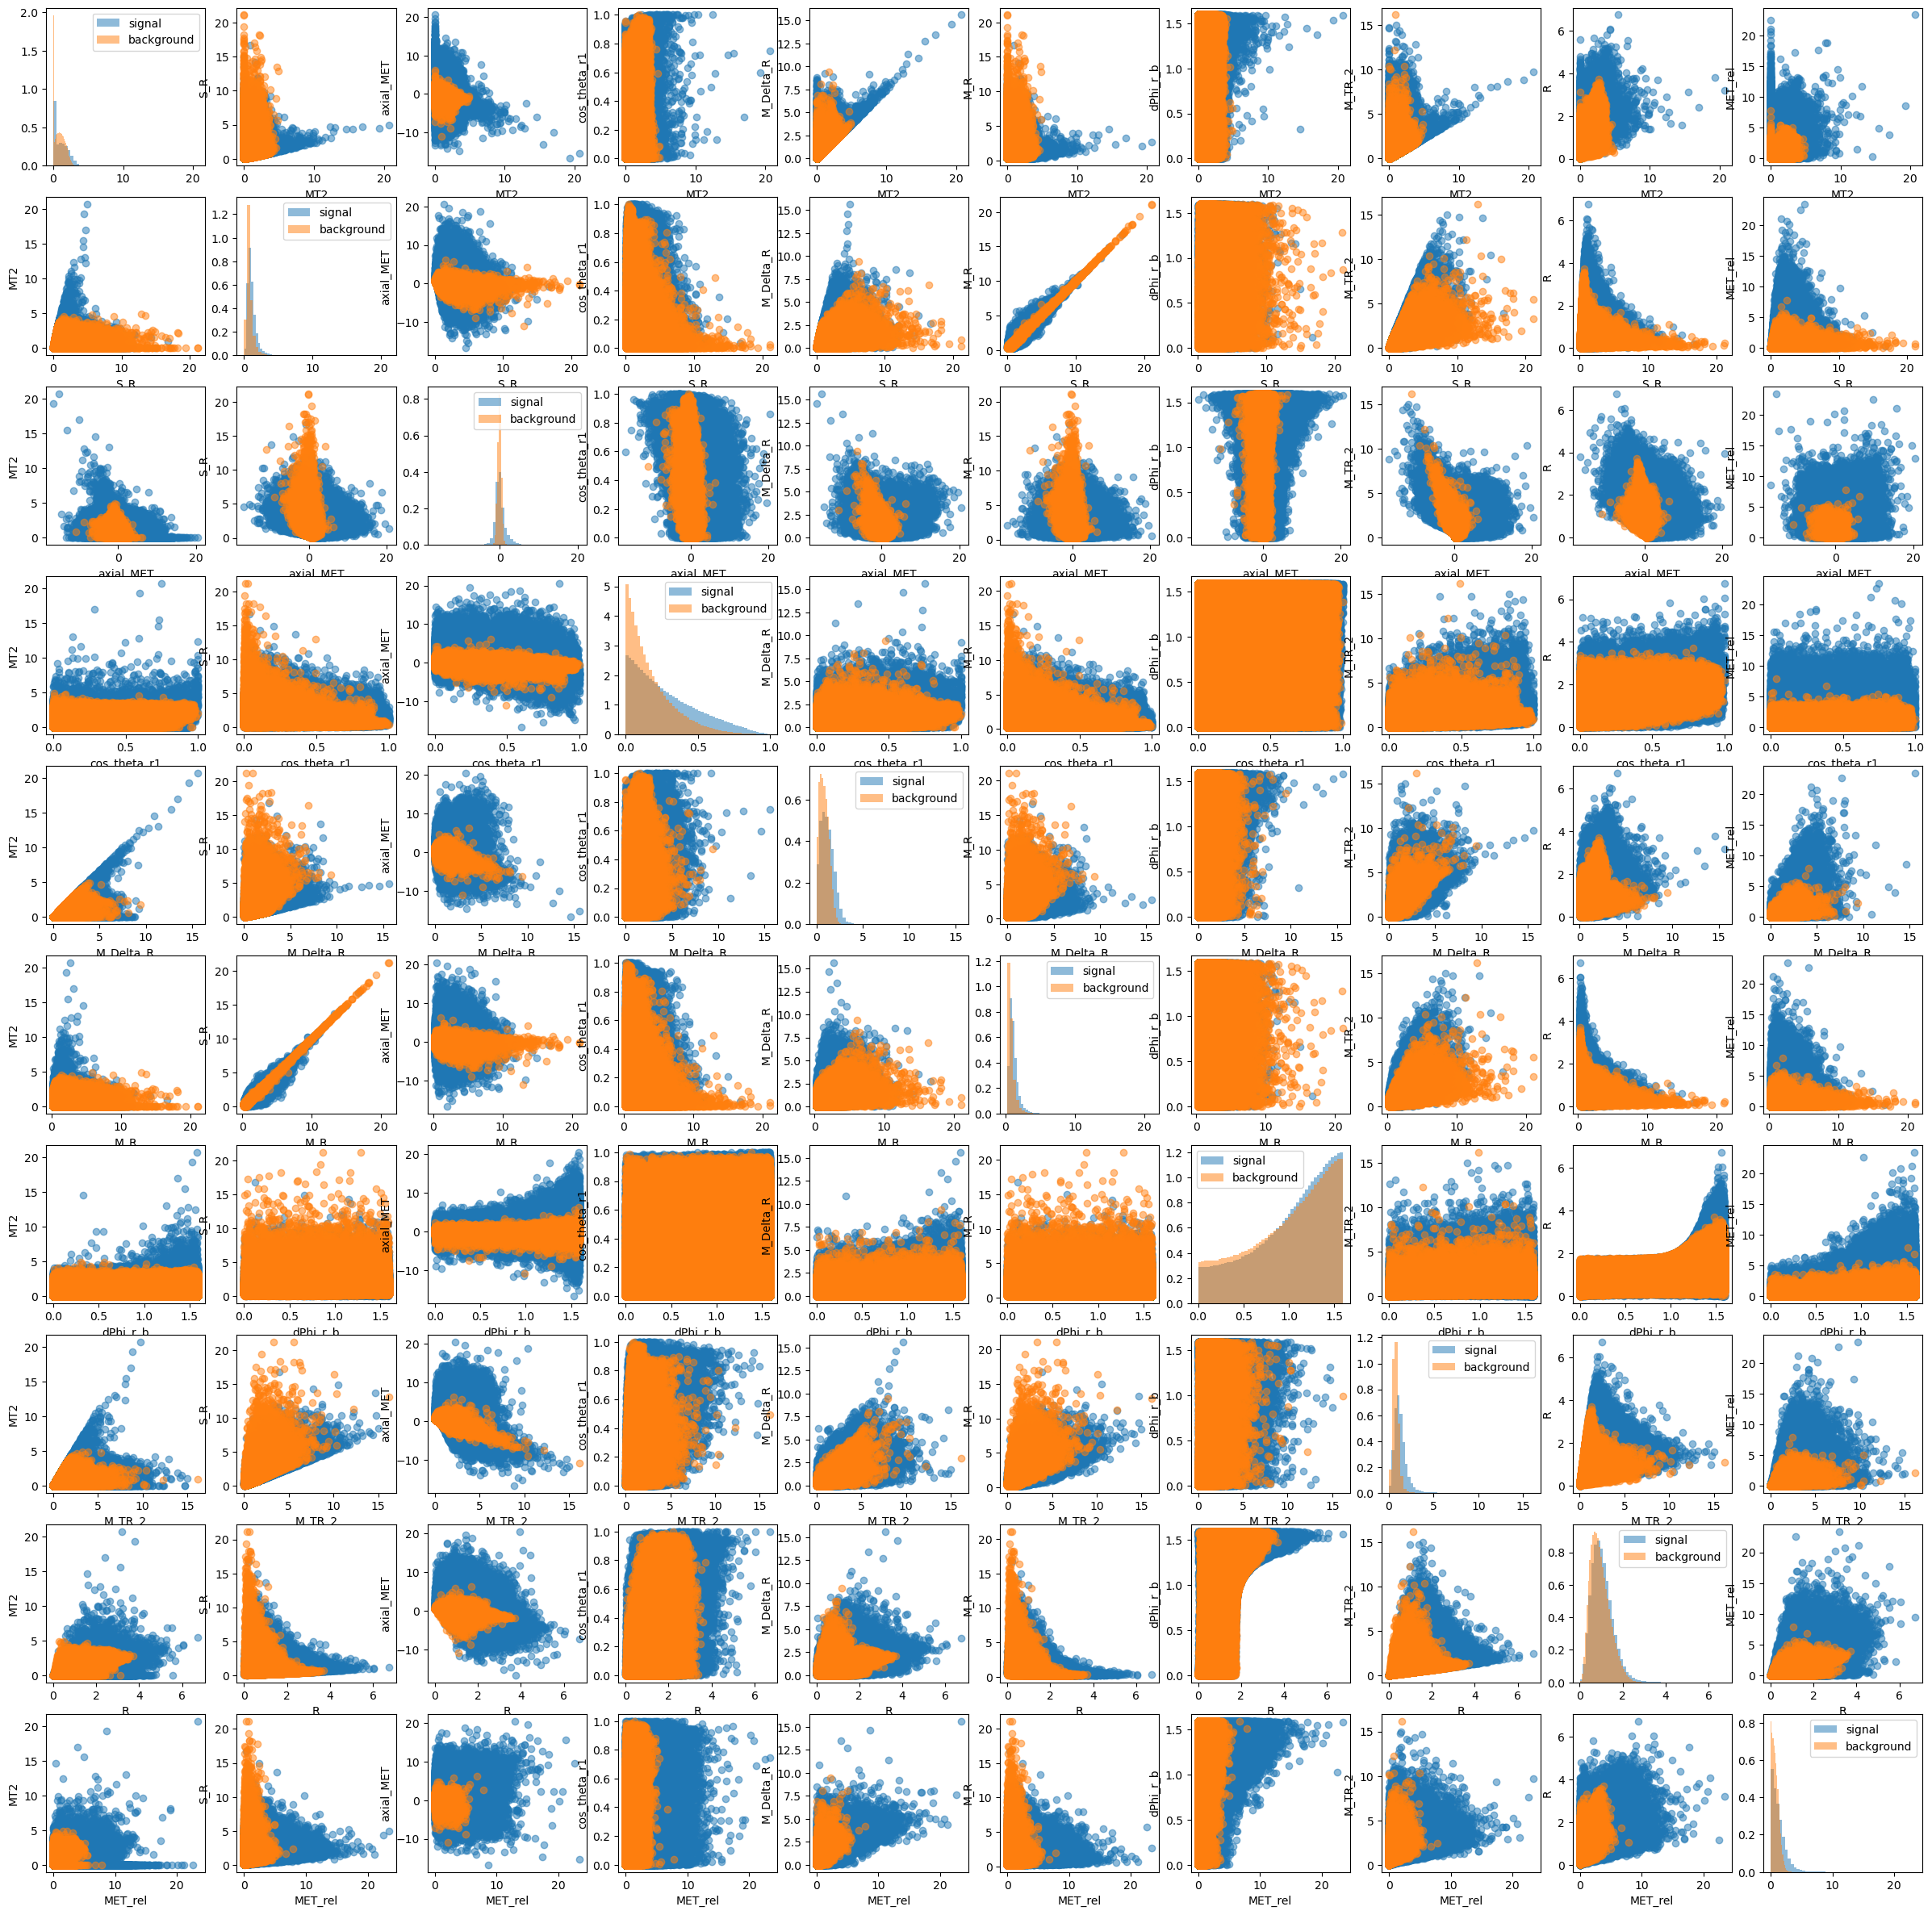

In [19]:
#high-level features (FeatureNames)
selection_dict={'signal':df['signal']==1,'background':df['signal']==0}
n_columns=len(FeatureNames)
plt.figure(figsize=(30,30))

plot_i=0
#iterating and enumerating through variables (high level features specifically)
for i,x_var_name in enumerate(FeatureNames):
    for j,y_var_name in enumerate(FeatureNames):
        plot_i+=1
        plt.subplot(n_columns,n_columns,plot_i)
        make_legend = plot_i==1
        if i==j:
            compare_distributions(df,x_var_name,
                     selection_dict,
                     alpha=0.5,
                     density=1,
                     bins=50,
                     )
        else:
            compare_scatter(df,x_var_name,y_var_name,selection_dict,make_legend=make_legend,alpha=0.5)

### Exercise 4.2

#### Part a
Install [tabulate](https://github.com/astanin/python-tabulate). 

#### Part b
Use numpy to compute the [covariance matrix](https://numpy.org/doc/stable/reference/generated/numpy.cov.html) and [correlation matrix](https://numpy.org/doc/stable/reference/generated/numpy.corrcoef.html) between all observabes, and separately between low and high-level features.

#### Part c
Use tabulate to create a well formatted table of the covariance and correlation matrices, with nice headings and appropriate significant figures. Embed the table into this notebook.

#### Part d
Write a function that takes a dataset and appropriate arguments and performs steps b and c.  

Hint: Example code for embedding a `tabulate` table into a notebook:

In [21]:
from IPython.display import HTML, display
import tabulate
table = [["A",1,2],
        ["C",3,4],
        ["D",5,6]]
display(HTML(tabulate.tabulate(table, tablefmt='html', headers=["X","Y","Z"])))

In [25]:
def relation_mat(df, columns, type='cov'):
    if type=='cov':
        table=np.cov(df, rowvar=False).tolist()
        for i in range(len(table)): table[i].insert(0,columns[i])
        return tabulate.tabulate(table, tablefmt='html', headers=columns)
    elif type=='corrcoef':
        table=np.corrcoef(df, rowvar=False).tolist()
        for i in range(len(table)): table[i].insert(0,columns[i])
        return tabulate.tabulate(table, tablefmt='html', headers=columns)
    else: 
        print('Invalid Input')


In [26]:
df_small=df.head(10000)
df_high=df_small[FeatureNames]
df_low=df_small[RawNames]

In [27]:
# Covariance for low-level features
relation_mat(df_low, RawNames, type='cov')

'<table>\n<thead>\n<tr><th>       </th><th style="text-align: right;">     l_1_pT</th><th style="text-align: right;">    l_1_eta</th><th style="text-align: right;">    l_1_phi</th><th style="text-align: right;">     l_2_pT</th><th style="text-align: right;">    l_2_eta</th><th style="text-align: right;">    l_2_phi</th><th style="text-align: right;">        MET</th><th style="text-align: right;">    MET_phi</th></tr>\n</thead>\n<tbody>\n<tr><td>l_1_pT </td><td style="text-align: right;"> 0.460858  </td><td style="text-align: right;">-0.00418887</td><td style="text-align: right;">-0.00137079</td><td style="text-align: right;"> 0.294436  </td><td style="text-align: right;"> 0.00958541</td><td style="text-align: right;"> 0.00381466</td><td style="text-align: right;"> 0.240183  </td><td style="text-align: right;">-0.00352828</td></tr>\n<tr><td>l_1_eta</td><td style="text-align: right;">-0.00418887</td><td style="text-align: right;"> 1.00532   </td><td style="text-align: right;"> 0.00176701</td><td style="text-align: right;">-0.0078539 </td><td style="text-align: right;"> 0.401749  </td><td style="text-align: right;">-0.00991886</td><td style="text-align: right;">-0.00405443</td><td style="text-align: right;">-0.00487734</td></tr>\n<tr><td>l_1_phi</td><td style="text-align: right;">-0.00137079</td><td style="text-align: right;"> 0.00176701</td><td style="text-align: right;"> 1.00827   </td><td style="text-align: right;"> 0.00638461</td><td style="text-align: right;"> 0.00117765</td><td style="text-align: right;">-0.26708   </td><td style="text-align: right;">-0.0106857 </td><td style="text-align: right;">-0.183609  </td></tr>\n<tr><td>l_2_pT </td><td style="text-align: right;"> 0.294436  </td><td style="text-align: right;">-0.0078539 </td><td style="text-align: right;"> 0.00638461</td><td style="text-align: right;"> 0.411645  </td><td style="text-align: right;"> 0.00673714</td><td style="text-align: right;">-0.00860988</td><td style="text-align: right;"> 0.0887261 </td><td style="text-align: right;">-0.00425625</td></tr>\n<tr><td>l_2_eta</td><td style="text-align: right;"> 0.00958541</td><td style="text-align: right;"> 0.401749  </td><td style="text-align: right;"> 0.00117765</td><td style="text-align: right;"> 0.00673714</td><td style="text-align: right;"> 1.00844   </td><td style="text-align: right;">-0.00336057</td><td style="text-align: right;"> 0.00360387</td><td style="text-align: right;">-0.013826  </td></tr>\n<tr><td>l_2_phi</td><td style="text-align: right;"> 0.00381466</td><td style="text-align: right;">-0.00991886</td><td style="text-align: right;">-0.26708   </td><td style="text-align: right;">-0.00860988</td><td style="text-align: right;">-0.00336057</td><td style="text-align: right;"> 0.99862   </td><td style="text-align: right;"> 0.0052874 </td><td style="text-align: right;">-0.033386  </td></tr>\n<tr><td>MET    </td><td style="text-align: right;"> 0.240183  </td><td style="text-align: right;">-0.00405443</td><td style="text-align: right;">-0.0106857 </td><td style="text-align: right;"> 0.0887261 </td><td style="text-align: right;"> 0.00360387</td><td style="text-align: right;"> 0.0052874 </td><td style="text-align: right;"> 0.844474  </td><td style="text-align: right;"> 0.0123674 </td></tr>\n<tr><td>MET_phi</td><td style="text-align: right;">-0.00352828</td><td style="text-align: right;">-0.00487734</td><td style="text-align: right;">-0.183609  </td><td style="text-align: right;">-0.00425625</td><td style="text-align: right;">-0.013826  </td><td style="text-align: right;">-0.033386  </td><td style="text-align: right;"> 0.0123674 </td><td style="text-align: right;"> 1.0035    </td></tr>\n</tbody>\n</table>'

In [28]:
# Correlation for low-level features
relation_mat(df_low, RawNames, type='corrcoef')

'<table>\n<thead>\n<tr><th>       </th><th style="text-align: right;">     l_1_pT</th><th style="text-align: right;">    l_1_eta</th><th style="text-align: right;">    l_1_phi</th><th style="text-align: right;">     l_2_pT</th><th style="text-align: right;">    l_2_eta</th><th style="text-align: right;">    l_2_phi</th><th style="text-align: right;">        MET</th><th style="text-align: right;">    MET_phi</th></tr>\n</thead>\n<tbody>\n<tr><td>l_1_pT </td><td style="text-align: right;"> 1         </td><td style="text-align: right;">-0.00615407</td><td style="text-align: right;">-0.00201094</td><td style="text-align: right;"> 0.676     </td><td style="text-align: right;"> 0.0140606 </td><td style="text-align: right;"> 0.00562306</td><td style="text-align: right;"> 0.385004  </td><td style="text-align: right;">-0.00518827</td></tr>\n<tr><td>l_1_eta</td><td style="text-align: right;">-0.00615407</td><td style="text-align: right;"> 1         </td><td style="text-align: right;"> 0.00175508</td><td style="text-align: right;">-0.0122088 </td><td style="text-align: right;"> 0.399006  </td><td style="text-align: right;">-0.00989943</td><td style="text-align: right;">-0.00440033</td><td style="text-align: right;">-0.00485595</td></tr>\n<tr><td>l_1_phi</td><td style="text-align: right;">-0.00201094</td><td style="text-align: right;"> 0.00175508</td><td style="text-align: right;"> 1         </td><td style="text-align: right;"> 0.00991024</td><td style="text-align: right;"> 0.0011679 </td><td style="text-align: right;">-0.266166  </td><td style="text-align: right;">-0.0115803 </td><td style="text-align: right;">-0.182535  </td></tr>\n<tr><td>l_2_pT </td><td style="text-align: right;"> 0.676     </td><td style="text-align: right;">-0.0122088 </td><td style="text-align: right;"> 0.00991024</td><td style="text-align: right;"> 1         </td><td style="text-align: right;"> 0.0104566 </td><td style="text-align: right;">-0.0134288 </td><td style="text-align: right;"> 0.150486  </td><td style="text-align: right;">-0.00662229</td></tr>\n<tr><td>l_2_eta</td><td style="text-align: right;"> 0.0140606 </td><td style="text-align: right;"> 0.399006  </td><td style="text-align: right;"> 0.0011679 </td><td style="text-align: right;"> 0.0104566 </td><td style="text-align: right;"> 1         </td><td style="text-align: right;">-0.0033488 </td><td style="text-align: right;"> 0.00390528</td><td style="text-align: right;">-0.0137441 </td></tr>\n<tr><td>l_2_phi</td><td style="text-align: right;"> 0.00562306</td><td style="text-align: right;">-0.00989943</td><td style="text-align: right;">-0.266166  </td><td style="text-align: right;">-0.0134288 </td><td style="text-align: right;">-0.0033488 </td><td style="text-align: right;"> 1         </td><td style="text-align: right;"> 0.00575769</td><td style="text-align: right;">-0.0333508 </td></tr>\n<tr><td>MET    </td><td style="text-align: right;"> 0.385004  </td><td style="text-align: right;">-0.00440033</td><td style="text-align: right;">-0.0115803 </td><td style="text-align: right;"> 0.150486  </td><td style="text-align: right;"> 0.00390528</td><td style="text-align: right;"> 0.00575769</td><td style="text-align: right;"> 1         </td><td style="text-align: right;"> 0.0134347 </td></tr>\n<tr><td>MET_phi</td><td style="text-align: right;">-0.00518827</td><td style="text-align: right;">-0.00485595</td><td style="text-align: right;">-0.182535  </td><td style="text-align: right;">-0.00662229</td><td style="text-align: right;">-0.0137441 </td><td style="text-align: right;">-0.0333508 </td><td style="text-align: right;"> 0.0134347 </td><td style="text-align: right;"> 1         </td></tr>\n</tbody>\n</table>'

In [29]:
# Covariance for high-level features
relation_mat(df_high, FeatureNames, type='cov')

'<table>\n<thead>\n<tr><th>            </th><th style="text-align: right;">        MT2</th><th style="text-align: right;">        S_R</th><th style="text-align: right;">  axial_MET</th><th style="text-align: right;">  cos_theta_r1</th><th style="text-align: right;">  M_Delta_R</th><th style="text-align: right;">       M_R</th><th style="text-align: right;">   dPhi_r_b</th><th style="text-align: right;">    M_TR_2</th><th style="text-align: right;">         R</th><th style="text-align: right;">   MET_rel</th></tr>\n</thead>\n<tbody>\n<tr><td>MT2         </td><td style="text-align: right;"> 0.71726   </td><td style="text-align: right;">-0.00846702</td><td style="text-align: right;"> -0.4669   </td><td style="text-align: right;">    0.044218  </td><td style="text-align: right;">  0.419803 </td><td style="text-align: right;">-0.0338709</td><td style="text-align: right;"> 0.019395  </td><td style="text-align: right;"> 0.185913 </td><td style="text-align: right;"> 0.231913 </td><td style="text-align: right;"> 0.394666 </td></tr>\n<tr><td>S_R         </td><td style="text-align: right;">-0.00846702</td><td style="text-align: right;"> 0.393243  </td><td style="text-align: right;"> -0.037946 </td><td style="text-align: right;">   -0.0108091 </td><td style="text-align: right;">  0.103416 </td><td style="text-align: right;"> 0.389839 </td><td style="text-align: right;"> 0.00441796</td><td style="text-align: right;"> 0.233243 </td><td style="text-align: right;">-0.0820159</td><td style="text-align: right;"> 0.090603 </td></tr>\n<tr><td>axial_MET   </td><td style="text-align: right;">-0.4669    </td><td style="text-align: right;">-0.037946  </td><td style="text-align: right;">  1.0909   </td><td style="text-align: right;">   -0.0538087 </td><td style="text-align: right;"> -0.219806 </td><td style="text-align: right;"> 0.0234859</td><td style="text-align: right;">-0.0282134 </td><td style="text-align: right;">-0.180339 </td><td style="text-align: right;">-0.188792 </td><td style="text-align: right;">-0.10336  </td></tr>\n<tr><td>cos_theta_r1</td><td style="text-align: right;"> 0.044218  </td><td style="text-align: right;">-0.0108091 </td><td style="text-align: right;"> -0.0538087</td><td style="text-align: right;">    0.0397094 </td><td style="text-align: right;">  0.0391529</td><td style="text-align: right;">-0.0147809</td><td style="text-align: right;"> 0.00912135</td><td style="text-align: right;"> 0.0521526</td><td style="text-align: right;"> 0.0588578</td><td style="text-align: right;"> 0.0554861</td></tr>\n<tr><td>M_Delta_R   </td><td style="text-align: right;"> 0.419803  </td><td style="text-align: right;"> 0.103416  </td><td style="text-align: right;"> -0.219806 </td><td style="text-align: right;">    0.0391529 </td><td style="text-align: right;">  0.388418 </td><td style="text-align: right;"> 0.0814464</td><td style="text-align: right;"> 0.0430602 </td><td style="text-align: right;"> 0.246363 </td><td style="text-align: right;"> 0.163815 </td><td style="text-align: right;"> 0.411801 </td></tr>\n<tr><td>M_R         </td><td style="text-align: right;">-0.0338709 </td><td style="text-align: right;"> 0.389839  </td><td style="text-align: right;">  0.0234859</td><td style="text-align: right;">   -0.0147809 </td><td style="text-align: right;">  0.0814464</td><td style="text-align: right;"> 0.40185  </td><td style="text-align: right;">-0.02221   </td><td style="text-align: right;"> 0.213275 </td><td style="text-align: right;">-0.112636 </td><td style="text-align: right;"> 0.0511766</td></tr>\n<tr><td>dPhi_r_b    </td><td style="text-align: right;"> 0.019395  </td><td style="text-align: right;"> 0.00441796</td><td style="text-align: right;"> -0.0282134</td><td style="text-align: right;">    0.00912135</td><td style="text-align: right;">  0.0430602</td><td style="text-align: right;">-0.02221  </td><td style="text-align: right;"> 0.191528  </td><td style="text-align: right;"> 0.0626079</td><td style="text-align: right;"> 0.0860049</td><td sty

In [30]:
# Correlation for high-level features
relation_mat(df_high, FeatureNames, type='corrcoef')

'<table>\n<thead>\n<tr><th>            </th><th style="text-align: right;">       MT2</th><th style="text-align: right;">       S_R</th><th style="text-align: right;">  axial_MET</th><th style="text-align: right;">  cos_theta_r1</th><th style="text-align: right;">  M_Delta_R</th><th style="text-align: right;">       M_R</th><th style="text-align: right;">  dPhi_r_b</th><th style="text-align: right;">   M_TR_2</th><th style="text-align: right;">        R</th><th style="text-align: right;">   MET_rel</th></tr>\n</thead>\n<tbody>\n<tr><td>MT2         </td><td style="text-align: right;"> 1        </td><td style="text-align: right;">-0.0159427</td><td style="text-align: right;"> -0.52783  </td><td style="text-align: right;">     0.262008 </td><td style="text-align: right;">   0.795349</td><td style="text-align: right;">-0.0630895</td><td style="text-align: right;"> 0.0523281</td><td style="text-align: right;"> 0.374751</td><td style="text-align: right;"> 0.578064</td><td style="text-align: right;"> 0.521504 </td></tr>\n<tr><td>S_R         </td><td style="text-align: right;">-0.0159427</td><td style="text-align: right;"> 1        </td><td style="text-align: right;"> -0.0579354</td><td style="text-align: right;">    -0.0864994</td><td style="text-align: right;">   0.26461 </td><td style="text-align: right;"> 0.98067  </td><td style="text-align: right;"> 0.0160981</td><td style="text-align: right;"> 0.634966</td><td style="text-align: right;">-0.276093</td><td style="text-align: right;"> 0.161688 </td></tr>\n<tr><td>axial_MET   </td><td style="text-align: right;">-0.52783  </td><td style="text-align: right;">-0.0579354</td><td style="text-align: right;">  1        </td><td style="text-align: right;">    -0.258532 </td><td style="text-align: right;">  -0.337674</td><td style="text-align: right;"> 0.0354718</td><td style="text-align: right;">-0.0617232</td><td style="text-align: right;">-0.294761</td><td style="text-align: right;">-0.381575</td><td style="text-align: right;">-0.110746 </td></tr>\n<tr><td>cos_theta_r1</td><td style="text-align: right;"> 0.262008 </td><td style="text-align: right;">-0.0864994</td><td style="text-align: right;"> -0.258532 </td><td style="text-align: right;">     1        </td><td style="text-align: right;">   0.315258</td><td style="text-align: right;">-0.117009 </td><td style="text-align: right;"> 0.104592 </td><td style="text-align: right;"> 0.446788</td><td style="text-align: right;"> 0.623513</td><td style="text-align: right;"> 0.311604 </td></tr>\n<tr><td>M_Delta_R   </td><td style="text-align: right;"> 0.795349 </td><td style="text-align: right;"> 0.26461  </td><td style="text-align: right;"> -0.337674 </td><td style="text-align: right;">     0.315258 </td><td style="text-align: right;">   1       </td><td style="text-align: right;"> 0.206153 </td><td style="text-align: right;"> 0.157874 </td><td style="text-align: right;"> 0.674836</td><td style="text-align: right;"> 0.554871</td><td style="text-align: right;"> 0.739441 </td></tr>\n<tr><td>M_R         </td><td style="text-align: right;">-0.0630895</td><td style="text-align: right;"> 0.98067  </td><td style="text-align: right;">  0.0354718</td><td style="text-align: right;">    -0.117009 </td><td style="text-align: right;">   0.206153</td><td style="text-align: right;"> 1        </td><td style="text-align: right;">-0.0800573</td><td style="text-align: right;"> 0.574355</td><td style="text-align: right;">-0.37509 </td><td style="text-align: right;"> 0.0903453</td></tr>\n<tr><td>dPhi_r_b    </td><td style="text-align: right;"> 0.0523281</td><td style="text-align: right;"> 0.0160981</td><td style="text-align: right;"> -0.0617232</td><td style="text-align: right;">     0.104592 </td><td style="text-align: right;">   0.157874</td><td style="text-align: right;">-0.0800573</td><td style="text-align: right;"> 1        </td><td style="text-align: right;"> 0.244223</td><td style="text-align: right;"> 0.414855</td><td style="text-align: right;"> 0.382852 </td><

## Exercise 5: Selection

### Exercise 5.1

Part a
By looking at the signal/background distributions for each observable (e.g. $x$) determine which selection criteria would be optimal: 

1. $x > x_c$
2. $x < x_c$
3. $|x - \mu| > x_c$
4. $|x - \mu| < x_c$

where $x_c$ is value to be determined below.

### Exercise 5.2

Plot the True Positive Rate (TPR) (aka signal efficiency $\epsilon_S(x_c)$) and False Positive Rate (FPR) (aka background efficiency $\epsilon_B(x_c)$) as function of $x_c$ for applying the strategy in part a to each observable. 

### Exercise 5.3
Assume 3 different scenarios corresponding to different numbers of signal and background events expected in data:

1. Expect $N_S=10$, $N_B=100$.
1. Expect $N_S=100$, $N_B=1000$.
1. Expect $N_S=1000$, $N_B=10000$.
1. Expect $N_S=10000$, $N_B=100000$.

Plot the significance ($\sigma_{S'}$) for each observable as function of $x_c$ for each scenario, where 

$\sigma_{S'}= \frac{N'_S}{\sqrt{N'_S+N'_B}}$

and $N'_{S,B} = \epsilon_{S,B}(x_c) * N_{S,B}$.

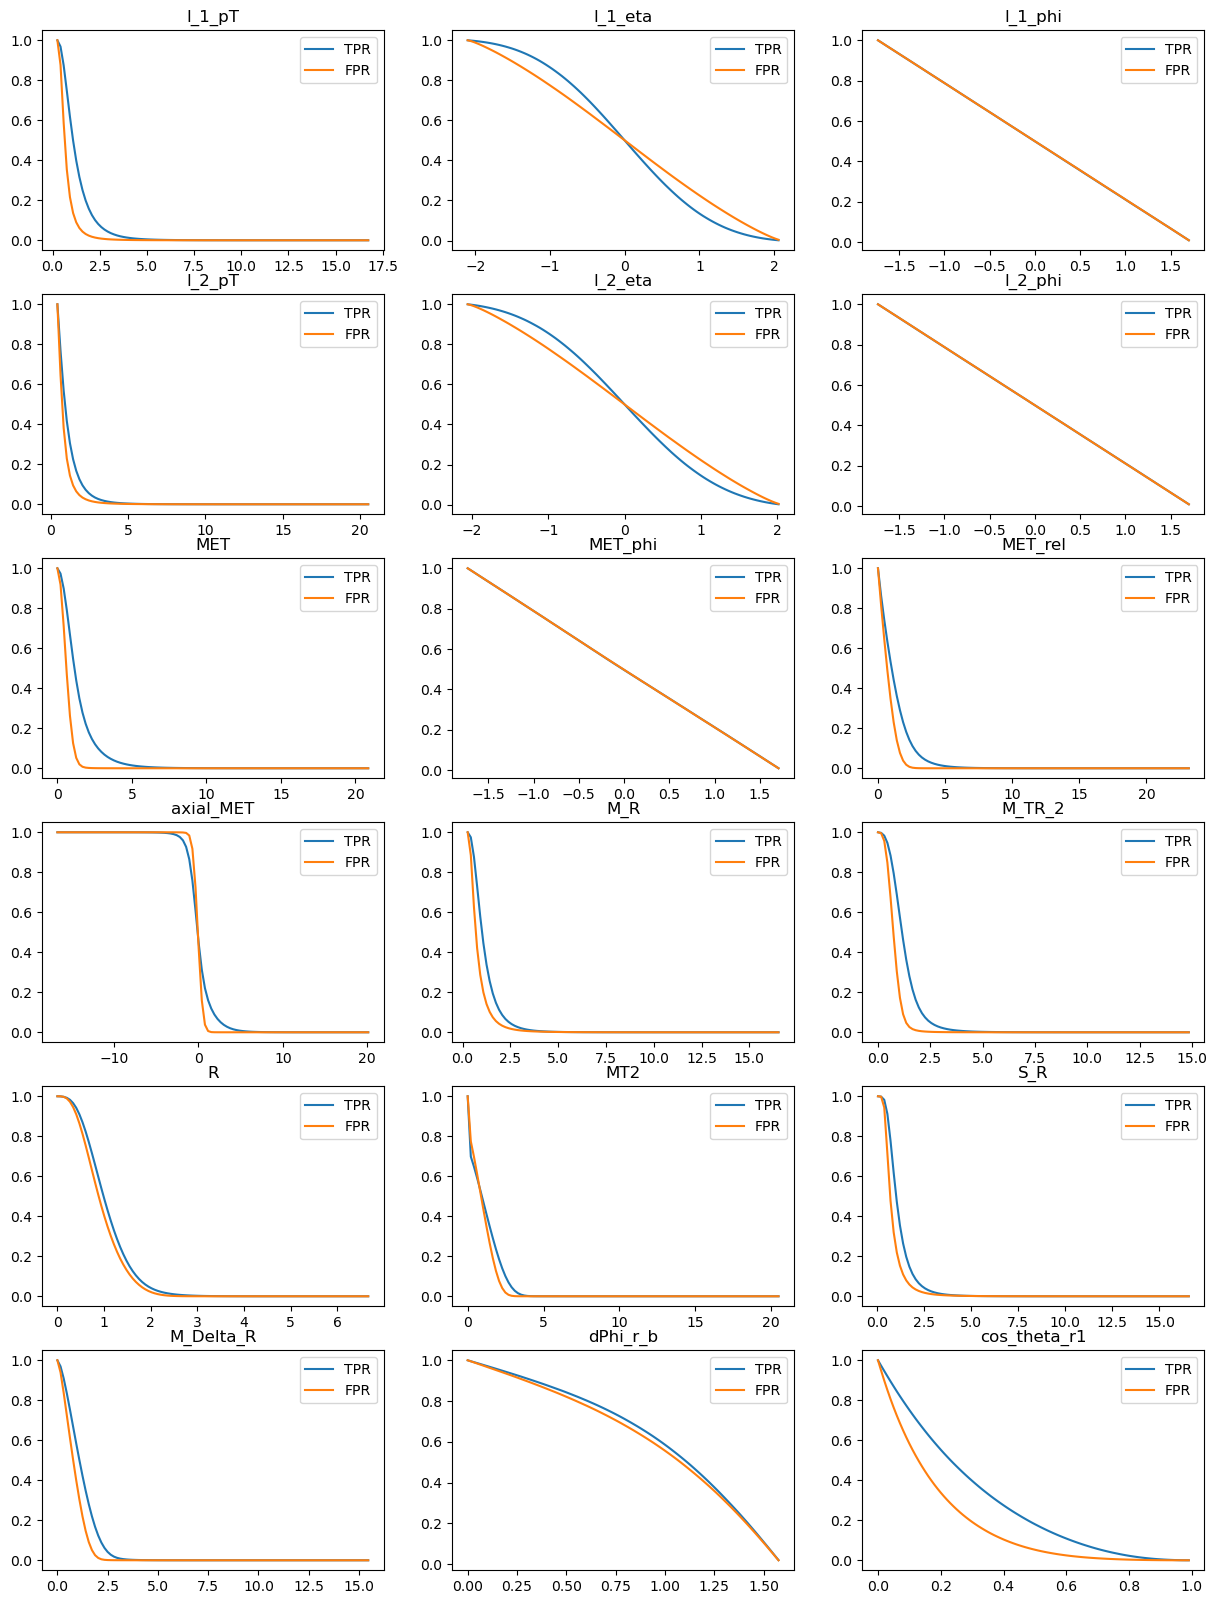

In [31]:
#5.2 TPR/FPR

#function to calculate rate given a feature
def compute_rate(d,bins=100):
    hist,bins_=np.histogram(d,bins=bins,density=True) #getting histogram counts and bins
    R = np.cumsum(hist[::-1])[::-1] * (bins_[1]-bins_[0]) #calculating the rate by taking the sum of differences
    return R,bins_

#dropping first column
data=df.drop('signal',axis=1)

plt.figure(figsize=(15,20))
#loop to compute TPR/FPR for each feature and plot TPR/FPR
for i,var in enumerate(data.columns):
    #layout of plots, 7 rows, 3 columns; i+1 indicates index
    plt.subplot(6,3,i+1)

    #calling compute_rate function to calculate TPR/FPR
    TPR,bins=compute_rate(df_sig[var])
    FPR,bins=compute_rate(df_bkg[var],bins=bins)

    #plotting TPR/FPR
    plt.plot(bins[:-1],TPR,label="TPR")
    plt.plot(bins[:-1],FPR,label="FPR")
    plt.title(var)
    plt.legend()


MET


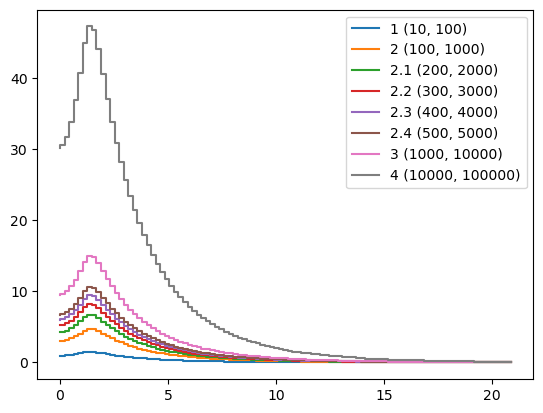

MET_phi


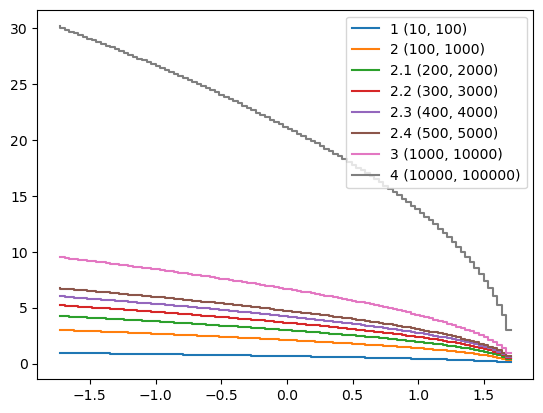

MET_rel


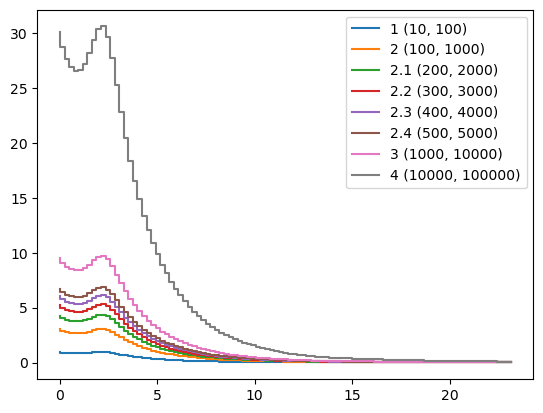

axial_MET


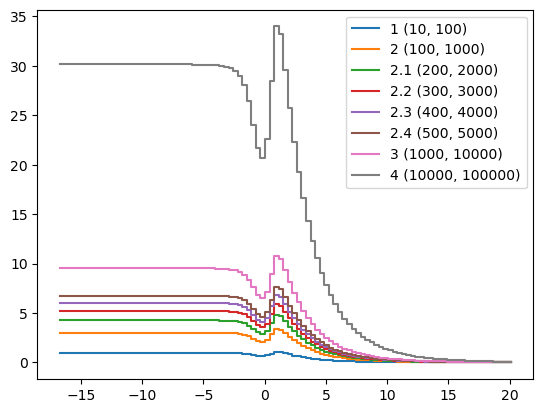

M_R


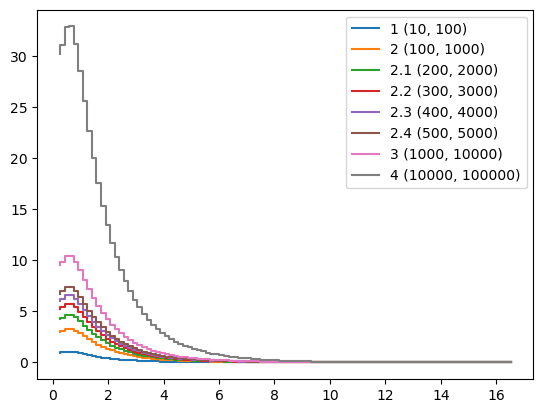

M_TR_2


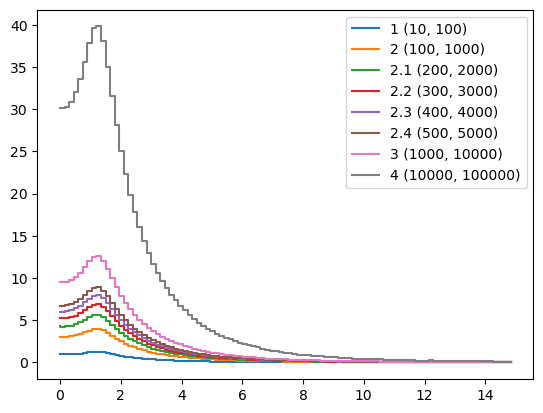

R


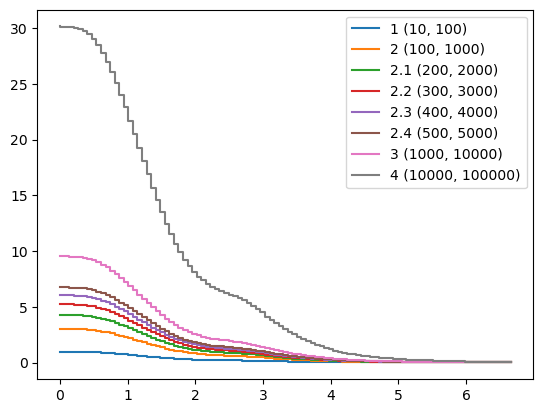

MT2


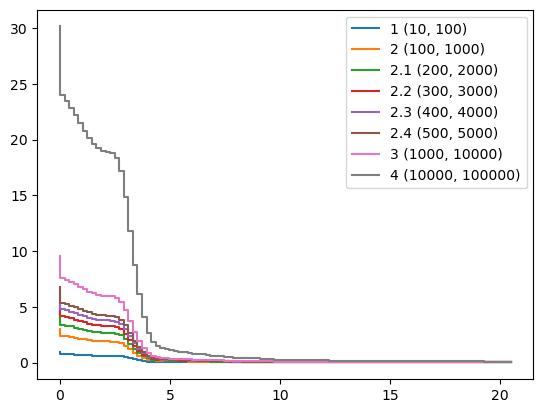

S_R


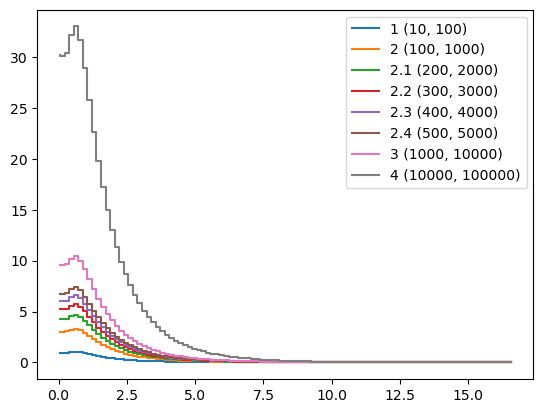

M_Delta_R


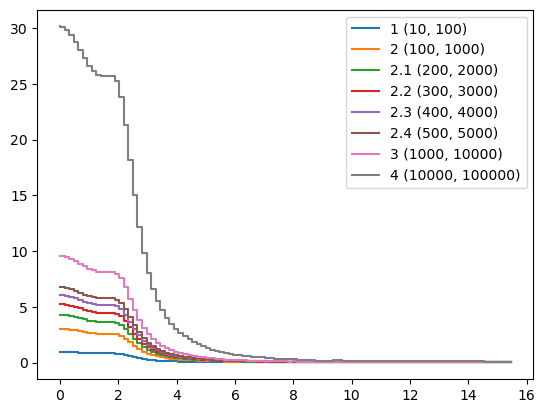

dPhi_r_b


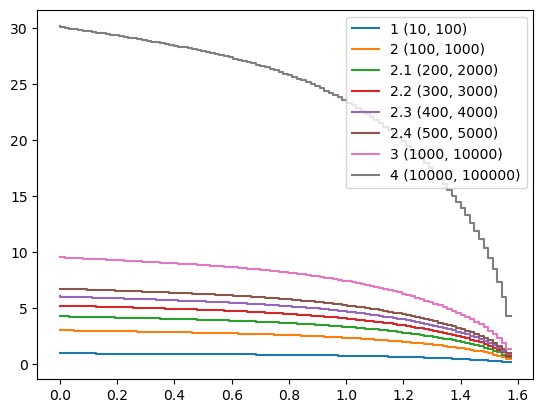

cos_theta_r1


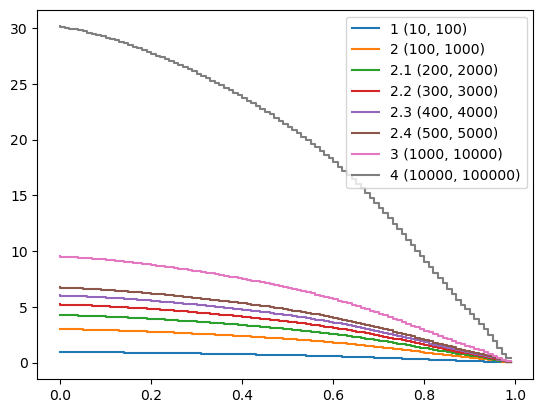

In [32]:
#5.3

#defining expected values
n_bkg_expected = 10000
n_sig_expected = 1000

#defining scenarios
scenarios = { "1": (10,100), 
              "2": (100,1000),
              "2.1": (200,2000),
              "2.2": (300,3000),
              "2.3": (400,4000),
              "2.4": (500,5000),
              "3": (1000,10000),
              "4": (10000,100000)}

#observations as list
my_obs= ['MET','MET_phi','MET_rel','axial_MET','M_R','M_TR_2','R','MT2','S_R','M_Delta_R','dPhi_r_b','cos_theta_r1']

#function to compute rate, but using np instead of matplotlib
def compute_rate(d,bins=100):
    hist,bins_=np.histogram(d,bins=bins,density=True)
    R = np.cumsum(hist[::-1])[::-1] * (bins_[1]-bins_[0])
    return R,bins_

#function to plot scenarios and give table of values
def compare_significance(df_sig, df_bkg,
                         obs_name,
                         scenarios,bins=100,log=False):

    #calculating TPR/FPR using function based on np not matplotlib
    TPR,bins_sig = compute_rate(df_sig[obs_name],bins=bins)
    FPR,bins_sig = compute_rate(df_bkg[obs_name],bins=bins_sig)

    #setting up empty variables
    max_sigs=dict()
    table=list()

    #iterating through scenarios, finding max significance
    for name, (n_sig_expected, n_bkg_expected) in scenarios.items():

        n_sig_expected_prime = n_sig_expected * TPR
        n_bkg_expected_prime = n_bkg_expected * FPR


        sig = n_sig_expected_prime/ np.sqrt(n_sig_expected_prime + n_bkg_expected_prime )
        plt.step(bins_sig[:-1],sig,label=name+" "+str((n_sig_expected, n_bkg_expected)))
    
        max_i=np.argmax(sig)
        max_sigs[name]=(max_i,n_sig_expected_prime[max_i],n_bkg_expected_prime[max_i],sig[max_i],bins_sig[max_i])
        table.append((name,n_sig_expected, n_bkg_expected, 
                      TPR[max_i],FPR[max_i],
                      n_sig_expected_prime[max_i],n_bkg_expected_prime[max_i],sig[max_i],bins_sig[max_i],max_i)
        )
    if log:
        plt.yscale("log")
    plt.legend()
    plt.show()
    
    display(HTML(tabulate.tabulate(table, tablefmt='html',
                                   headers=["Name",'N sig','N bkg',"TPR","FPR","N sig'","N bkg'",'sig','x_c',"bin i"])))
    return max_sigs

#iterating through all selected observations
for obs in my_obs:
    print(obs)
    _=compare_significance(df_sig,df_bkg,obs,scenarios)

## Exercise 6: Cut Flow


### Exercise 6.1

For each above scenario, choose a subset (minumum 3) of observables to use for selections, and values of $x_c$ based on your significance plots (part 3c). 

### Exercise 6.2
Create a "cut-flow" table for each scenario where you successively make the selections on each observable and tabulate $\epsilon_S$, $\epsilon_B$, $N'_S$, $N'_B$, and $\sigma_{S'}$.

### Exercise 6.3
In 3c above you computed the significance for each observable assuming to make no other selections on any other observable. If the variables are correlated, then this assumption can lead to non-optimial results when selecting on multiple variables. By looking at the correlation matrices and your answers to 4b, identify where this effect could be most detrimental to the significance. Attempt to correct the issue by applying the selection in one observable and then optimizing (part 3c) for a second observable. What happens if you change the order of your selection (make selection on second and optimize on first)?




In [33]:
#6.1

sel_obs=['M_Delta_R','MET_rel','M_R']

df_sig["M_TR_2"]>1.35029

df_sig_1 = df_sig[df_sig["M_TR_2"]>1.35029]
df_bkg_1 = df_bkg[df_bkg["M_TR_2"]>1.35029]

eff_s = df_sig_1.shape[0]/df_sig.shape[0]
eff_b = df_bkg_1.shape[0]/df_bkg.shape[0]

scenarios_1 =dict(zip(scenarios.keys(),map(lambda x: (eff_s*x[0],eff_b*x[1]),scenarios.values())))
scenarios_1

{'1': (3.632149633691708, 4.698077888099321),
 '2': (36.32149633691708, 46.980778880993206),
 '2.1': (72.64299267383416, 93.96155776198641),
 '2.2': (108.96448901075124, 140.94233664297963),
 '2.3': (145.28598534766832, 187.92311552397283),
 '2.4': (181.6074816845854, 234.90389440496605),
 '3': (363.2149633691708, 469.8077888099321),
 '4': (3632.149633691708, 4698.077888099321)}

M_Delta_R


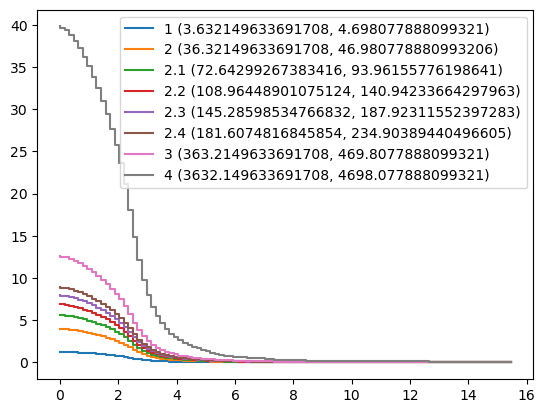

MET_rel


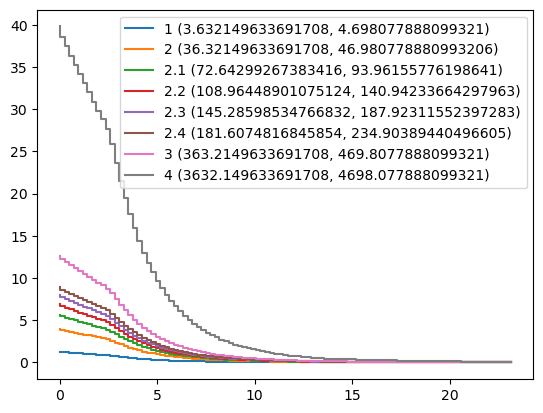

M_R


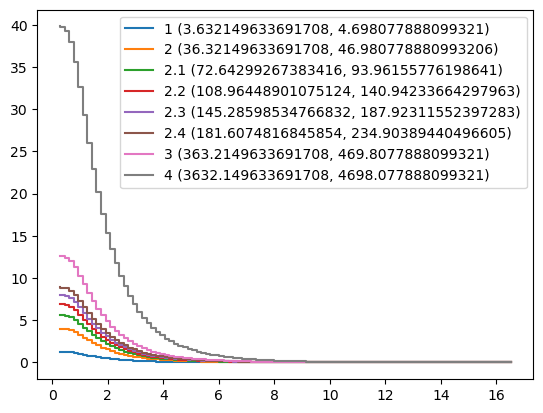

In [36]:
#6.2
for selection in sel_obs:
    print(selection)
    _=compare_significance(df_sig_1,df_bkg_1,selection,scenarios_1)

## Exercise 7: ROC Curves

### Exercise 7.1
For the top 3 observables you identified earlier, create one figure overlaying the Reciever Operating Characteristic (ROC) curves for the 3 observables. Compute the area under the curves and report it in the legend of the figure.

### Exercise 7.2
Write a function that you can use to quickly create the figure in part a with other observables and different conditions. Note that you will likely revise this function as you do the remainder of the lab.

### Exercise 7.3
Use the function from part b to compare the ROC curves for the successive selections in lab 3, exercise 4. Specifically, plot the ROC curve after each selection.

### Exercise 7.4
Use your function and appropriate example to demonstrate the effect (if any) of changing order of the successive selections.



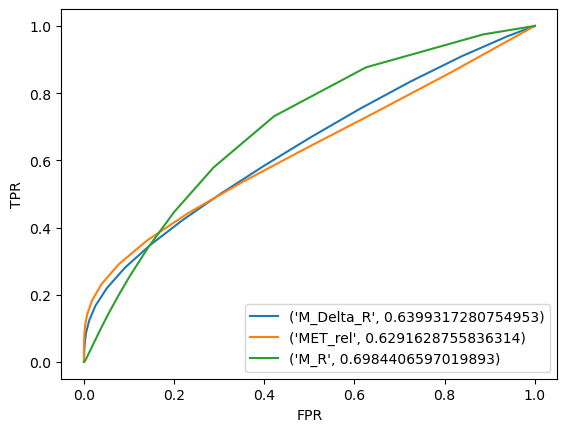

In [37]:
#7.1
#function for calculating AUC
def AUC(TPR,FPR):
    n = FPR.shape[0]
    return np.sum((FPR[0:n-1]-FPR[1:]) * (TPR[0:n-1]+TPR[1:])/2)

legend_list=[]
    
#ROC curve
for selection in sel_obs:

    #calculating TPR/FPR/AUC
    TPR,bins=compute_rate(df_sig[selection])
    FPR,bins=compute_rate(df_bkg[selection],bins=bins)
    auc_val=AUC(TPR,FPR)

    #adding observation name and AUC to list for legend
    legend_list.append((selection,auc_val))    

    #plotting ROC curve
    plt.plot(FPR,TPR)
    plt.xlabel("FPR")
    plt.ylabel("TPR")
    
plt.legend(legend_list)
plt.show()

In [38]:
#7.2
def roc_curve(features):
    legend_list=[]
    for var in features:
        TPR,bins=compute_rate(df_sig[var])
        FPR,bins=compute_rate(df_bkg[var],bins=bins)
        auc_val=AUC(TPR,FPR)

        legend_list.append((var,auc_val))
        
        plt.plot(FPR,TPR)
        plt.xlabel("FPR")
        plt.ylabel("TPR")
        
    plt.legend(legend_list)
    plt.title('ROC Curves')
    plt.show()

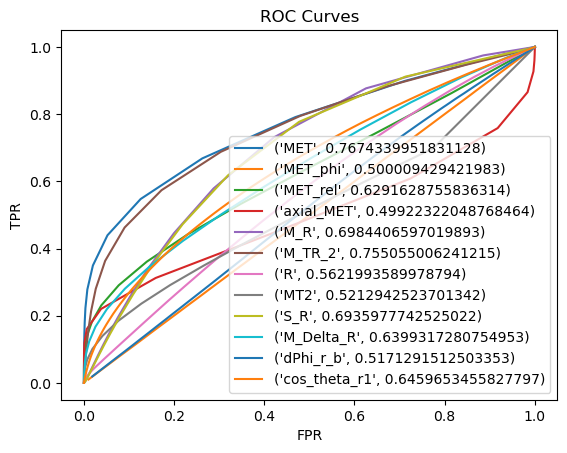

In [39]:
#7.3
roc_curve(my_obs)

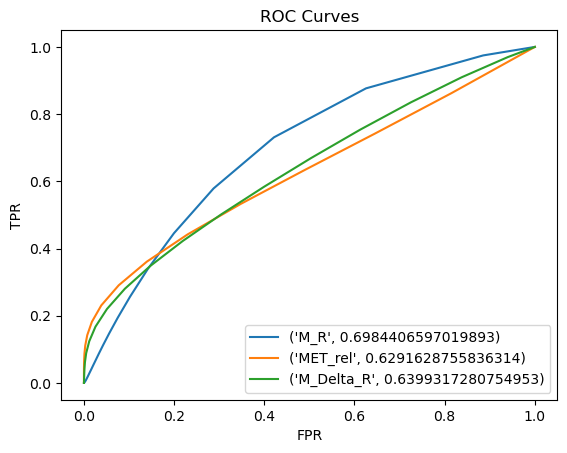

In [40]:
#7.4
#backwards list of sel_obs
new_set=sel_obs[::-1]
roc_curve(new_set) #plotting ROC curves

## Exercise 8: Linear Discriminant

### Exercise 8.1

Using numpy, compute the between-class $\bf{S}_B$ and within-class $\bf{S}_W$ covariance matrices defined as:

$$
\bf{S}_B = (\bf{m_2}-\bf{m_1})(\bf{m_2}-\bf{m_1})^T \\
$$
$$
\bf{S}_W = \sum_{i=1,2} \sum_{n=1}^{l_i} (\bf{x}_n^i - \bf{m}_i) (\bf{x}_n^i - \bf{m}_i)^T
$$

where $\bf{m_i}$ are the vectors containing the means for category 1 and 2, here defined as signal and background. Here $\bf{x}_n^i$ is the vector containing the observables for the $n$th example event in category $i$.

### Exercise 8.1

Compute the linear coefficients $\bf{w} = \bf{S_W}^{-1}(\bf{m_2}-\bf{m_1})$. Compare the histogram of the distribution of $F_n^i=\bf{w}^T\bf{x}_n^i$ for the two categories.

### Exercise 8.1

Draw the ROC curve for $F_n$. 

### Exercise 8.1

What is the maximal significance you can obtain in the scenarios in exercise 5? 

In [41]:
df_sig_0 = df_sig.drop("signal",axis=1)
df_bkg_0 = df_bkg.drop("signal",axis=1)

m_s= np.mean(df_sig_0,axis=0)
m_b= np.mean(df_bkg_0,axis=0)

delta=np.matrix(m_s-m_b).transpose()
S_B= delta*delta.transpose()

delta_s=np.matrix(df_sig_0-m_s).transpose()
S_W_s= delta_s*delta_s.transpose()

delta_b=np.matrix(df_bkg_0-m_b).transpose()
S_W_b= delta_b*delta_b.transpose()

S_W=S_W_s+S_W_b
S_W_inv = np.linalg.inv(S_W)
w = S_W_inv * np.matrix(m_b - m_s).transpose()

w_1 = w / sum(w)

output_s=np.matrix(df_sig_0)*w_1
output_b=np.matrix(df_bkg_0)*w_1

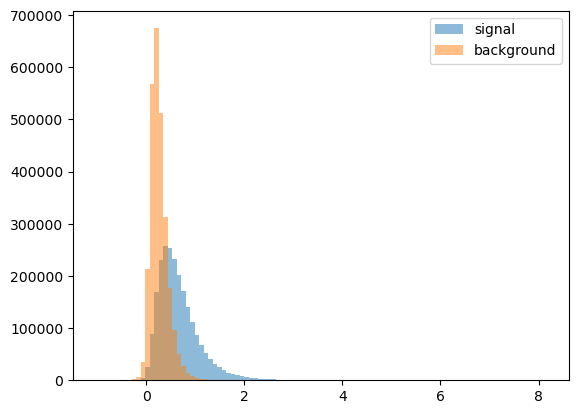

In [42]:
h_s,bins,_=plt.hist(output_s,label="signal",alpha=0.5,bins=100)
h_b,bins,_=plt.hist(output_b,bins=bins,alpha=0.5,label="background")
plt.legend()

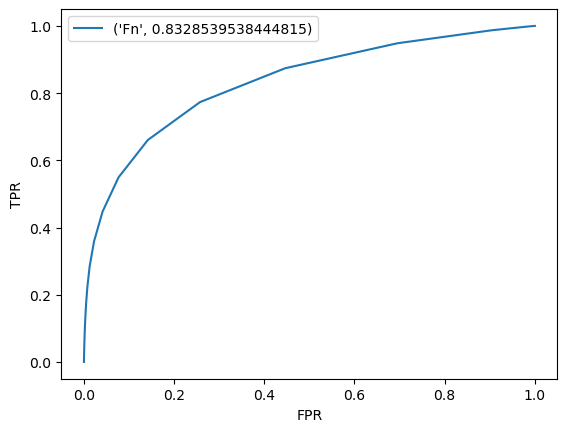

In [45]:
#ROC of Fn

leg_list=[]

#calculating TPR/FPR/AUC
TPR,bins=compute_rate(output_s)
FPR,bins=compute_rate(output_b,bins=bins)
auc_val=AUC(TPR,FPR)

#adding observation name and AUC to list for legend
leg_list.append(('Fn',auc_val))    

#plotting ROC curve
plt.plot(FPR,TPR)
plt.xlabel("FPR")
plt.ylabel("TPR")
    
plt.legend(leg_list)
plt.show()

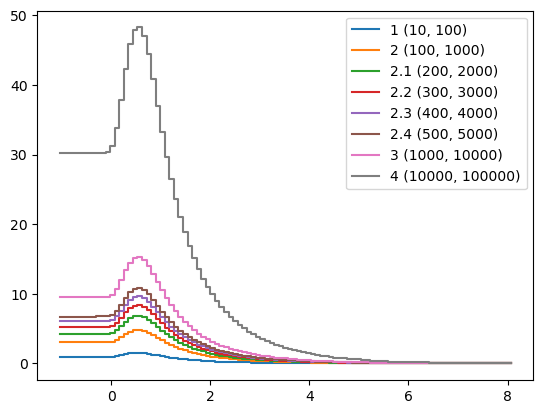

{'1': (18,
  4.474416116253549,
  4.131053343200168,
  1.5252782829223648,
  0.6215873534238447),
 '2': (18,
  44.74416116253549,
  41.31053343200169,
  4.82335343962538,
  0.6215873534238447),
 '2.1': (18,
  89.48832232507098,
  82.62106686400338,
  6.821251850437129,
  0.6215873534238447),
 '2.2': (18,
  134.23248348760646,
  123.93160029600506,
  8.354293220293258,
  0.6215873534238447),
 '2.3': (18,
  178.97664465014196,
  165.24213372800676,
  9.64670687925076,
  0.6215873534238447),
 '2.4': (18,
  223.72080581267744,
  206.55266716000844,
  10.785346170509774,
  0.6215873534238447),
 '3': (18,
  447.4416116253549,
  413.1053343200169,
  15.252782829223646,
  0.6215873534238447),
 '4': (18,
  4474.416116253549,
  4131.0533432001685,
  48.233534396253795,
  0.6215873534238447)}

In [46]:
pd.DataFrame(output_s)
max_sig=compare_significance(pd.DataFrame(output_s), pd.DataFrame(output_b), 0, scenarios)
max_sig